# Tour dos pacotes científicos principais

Existem três pacotes campeões na área científica.

* `numpy`, para computação numérica, possui *arrays* que são muito mais rápidos que listas em Python, e uma série de funções para manipular esses *arrays*. [docs](https://numpy.org/doc/stable/) e [livro recomendado](http://web.mit.edu/dvp/Public/numpybook.pdf)
* `pandas`, para o carregamento, processamento, limpeza, filtragem, agregação e exportação de dados. [docs](https://pandas.pydata.org/pandas-docs/stable/index.html)
* `matplotlib`, para a criação de gráficos. [docs](https://matplotlib.org/)
* `scipy`, com funções específicas para a área científica. [docs](https://docs.scipy.org/doc/scipy/index.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Cada um desses pacotes são um universo e nunca conseguirei fazer juz à todos, especialmente em um único capítulo. Eu começarei descrevendo cada um aos poucos, depois começarei a juntar as peças e por fim tentarei mostrar problemas mais completos.

(sec:basicos_np_1)=
## Básicos de `numpy` Parte 1

[Veja também a seção para iniciantes da documentação](https://numpy.org/doc/stable/user/absolute_beginners.html)

Listas em Python podem conter qualquer objetos de tipo. Números, strings, objetos complexos, qualquer coisa, de qualquer tamanho. Para isso, o interpretador precisa de uma série de abstrações que permitam essa flexibilidade, e isso traz lentidão. No centro de `numpy` temos os *arrays* como análogos a listas, mas:

* *arrays* precisam ser somente de um mesmo tipo, e esses tipos nem sempre são idênticos ao existentes em Python.
* *arrays* precisam de um tamanho fixo.

Essa rigidez traz algumas vantagens

* Flexibilidade no formato: *arrays* possuem um *buffer*, um bloco contíguo de memória, contendo informação (bytes), e uma descrição desses dados, como o número de linhas, colunas, tipo do dado. Assim, `numpy` consegue acessar qualquer elemento com muita rapidez, com um simples cálculo de posição. Além disso, quando queremos transformar um *array*, com uma transposta ou uma alteração no número de linhas ou colunas, não precisamos alterar esse bloco de memória, somente os cálculos para encontrar os elementos.
* Expressividade: operações em todos os elementos, algo muito comum, podem ser feitas como se um *array* fosse um escalar qualquer, sem termos que nos preocupar com loops ao longo dos elementos.
* Vetorização: quando aplicamos operações em *arrays*, o processamento é transferido para a linguagem C, onde a velocidade de execução é mais rápida.

Logo, utilizar *arrays* nos permite ter código rápido e expressivo. 

### Declaração

Para criar um *array*, podemos utilizar a função `np.array` com um iterável.

In [2]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

Podemos também utilizar várias funções que geram *arrays*, como:

* `np.arange`, que é similar ao embutido `range`, mas onde podemos ter passos não inteiros

In [3]:
print(np.arange(10), np.arange(1, 10, 1), np.arange(2, 10, 0.375), sep="\n")

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
[2.    2.375 2.75  3.125 3.5   3.875 4.25  4.625 5.    5.375 5.75  6.125
 6.5   6.875 7.25  7.625 8.    8.375 8.75  9.125 9.5   9.875]


* `np.linspace`, que recebe um valor de início, fim e um número de pontos e retorna um *array* onde esses pontos são espaçados igualmente na escala linear. Importante realçar que neste caso o ponto final é incluído por padrão (*kwarg* `endpoint`). Logo, nestes exemplos o número de pontos pode *parecer* errado, m se você contá-los na mão verá todos tem o tamanho correto.

In [4]:
print(np.linspace(1, 10, num=10), np.linspace(1, 10, num=19), np.linspace(50, 100, num=6))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ] [ 50.  60.  70.  80.  90. 100.]


* `np.logspace`, que é similar a `np.linspace`, mas os dados são espaçados igualmente na escala log. Por padrão a base é 10, mas pode ser especificada com o *kwarg* `base`. Os valores fornecidos são a *potência* em que a base é elevada, então se quiser começar de 10, o valor de `start` é 1.

In [5]:
print(np.logspace(0, 3, num=4), np.logspace(-3, 3, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.geomspace` é similar a `np.logspace`, mas os pontos iniciais e finais são fornecidos diretamente, sem precisar colocar a base e expoente.

In [6]:
print(np.geomspace(1, 1000, num=4), np.geomspace(1e-3, 1000, num=7))

[   1.   10.  100. 1000.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


* `np.ones`, que gera uma *array* contendo somente uns do tamanho especificado.

In [7]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

* `np.zeros` faz o mesmo, mas contendo somente zeros

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* `np.ones_like` e `np.zeros_like` retornam *arrays* cheias de zeros ou uns com o mesmo formato de outra array

In [9]:
temp = np.array([1, 2, 3, 4, 5])
print(np.ones_like(temp), np.zeros_like(temp))

[1 1 1 1 1] [0 0 0 0 0]


Até agora todas as estruturas mostradas são 0-dimensionais. Não são como vetores linha ou coluna, são só sequências. Isso pode ser acessado pela propriedade `.shape`. A propriedade `.size` contém o número total de elementos.

In [10]:
print(temp.shape, temp.size)

(5,) 5


### Tipos

Na hora de criar *arrays*, um tipo pode ser especificado com o argumento `dtype`, comum em muitas funções para criação de *arrays*. Os tipos que são aceitos são diferentes de Python. Para ilustrar isso, vamos ver como ele se comporta ao tentarmos criar uma *array* com um número inteiro grande demais. 

Em Python, `int` são possui limite de tamanho. Cresce e diminui de maneira a atender as necessidades vigentes. Porém, em linguagens de programação um `int` tem um tamanho fixo, geralmente 32 ou 64 bits. Para um número inteiro de 32 bits, temos 2^32 valores diferentes. Em `numpy`, temos os tipos `np.int32` que representa um número inteiro de 32 bits com sinal e `np.uint32` que representa um número inteiro sem sinal. O valor máximo de `np.int32` é 2147483647 ($2^31 - 1$, lembre-se que 0 também conta) e o valor mínimo é, previsivelmente, -2147483647. O valor máximo de `np.uint32` é 4294967295 e o mínimo é 0. Se aumentarmos o número para 64 bits, temos 2^64 valores, uma quantidade estupendamente maior.

Veja os seguintes exemplos. Primeiro mostro como podemos criar um *array* com esse valor máximo em `np.int32`, `np.int64` e `np.uint32`. Mas se tento criar um *array* com um número acima do máximo, temos um `OverflowError`.

In [11]:
int32_max = 2147483647
print(np.array([int32_max], dtype=np.int32))
print(np.array([int32_max], dtype=np.int64))
print(np.array([int32_max], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int64))
print(np.array([int32_max + 1], dtype=np.uint32))
print(np.array([int32_max + 1], dtype=np.int32))

[2147483647]
[2147483647]
[2147483647]
[2147483648]
[2147483648]


OverflowError: Python int too large to convert to C long

Aqui, *overflow* significa que os bits para a criação passaram do comprimento reservado. Para ilustrar isso, vamos imaginar um byte, com 8 bits, em seu valor máximo, `0b1111_1111`. Se adicionarmos 1, atingimos `0b1_0000_0000`, mas como temos somente 8 bits de armazenamento, esse `1` à esquerda é perdido e resta somente `0` (ocorreu *overflow*)[^5]

[^5]: O mesmo pode ocorrer no outro sentido, com números com sinal, mas neste caso é chamado de *underflow*

Podemos isso ocorrendo diretamente neste exemplo. Ao invés de criar o *array* com o *overflow*, podemos criar e depois causar o *overflow* sem causar o erro.

In [12]:
print(
    np.array([2147483647], dtype=np.int32) + 1,
    np.array([4294967295], dtype=np.uint32) + 1,
)

[-2147483648] [0]


Podemos converter um array de um tipo para outro com o método `.astype`

In [13]:
arr_int = np.array([1, 2, 3])
print(arr_int, arr_int.astype(np.float64))

[1 2 3] [1. 2. 3.]


Quando um *array* é criado a partir de uma lista com elementos mistos, `numpy` tenta converter todos os valores para o tipo mais abrangente.

In [14]:
np.array([1, 1.1])

array([1. , 1.1])

`1` foi convertido em um `float`.

In [15]:
np.array([1, 1.1, "2.2"])

array(['1', '1.1', '2.2'], dtype='<U32')

`1` e `1.1` foram convertidos em strings.

### `arrays` multidimensionais

Podemos criar *arrays* multidimensionais com várias das funções anteriores. Aqui, `np.array` interpreta listas aninhadas como sendo multidimensionais, e `np.ones` ou `np.zeros` aceita um argumento com as dimensões da nova `array`.

In [16]:
print(
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([[1], [2], [3], [4], [5], [6]]),
    np.ones((2, 3)),
    np.zeros((3, 2)),
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0.]
 [0. 0.]
 [0. 0.]]


`np.ones_like`, `np.zeros_like` permite que uma *array* cheia de zeros ou uns com o mesmo formato de outra *array* seja criada.

In [17]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ones_like(arr_2d), "\n\n", np.zeros_like(arr_2d))

[[1 1 1]
 [1 1 1]] 

 [[0 0 0]
 [0 0 0]]


### Modificação de forma

E podemos alterar as dimensões de *arrays* com `reshape` e o número de linhas e colunas, desde que os números de elementos sejam compatíveis.

In [18]:
arr_0d = np.arange(1, 7, 1)
arr_1d_lin = arr_0d.reshape(1, 6)
arr_1d_col = arr_0d.reshape(6, 1)
arr_2d = arr_0d.reshape(2, 3)
arr_3d = arr_0d.reshape(1, 3, 2)
print(
    arr_0d,
    arr_0d.shape,
    arr_0d.size,
    "\n\n",
    arr_1d_lin,
    arr_1d_lin.shape,
    arr_1d_lin.size,
    "\n\n",
    arr_1d_col,
    arr_1d_col.shape,
    arr_1d_col.size,
    "\n\n",
    arr_2d,
    arr_2d.shape,
    arr_2d.size,
    "\n\n",
    arr_3d,
    arr_3d.shape,
    arr_3d.size,
)

[1 2 3 4 5 6] (6,) 6 

 [[1 2 3 4 5 6]] (1, 6) 6 

 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1) 6 

 [[1 2 3]
 [4 5 6]] (2, 3) 6 

 [[[1 2]
  [3 4]
  [5 6]]] (1, 3, 2) 6


Por praticidade, uma dimensão pode ser especificada como `-1`, deixando que seu valor seja calculado pelos outros valores.

In [19]:
arr_0d.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

Se quisermos acessar um elemento, podemos fazer com a notação de colchetes. Convenientemente, ao invés de termos que encadear colchetes, podemos fornecer o índice, ou slices, separados por vírgula.

In [20]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1],  # segundo linha, segunda coluna
    loc[:, 0],  # "todas as linhas, primeira coluna"
    loc[1, :],  # "segunda linha, todas as colunas"
    loc[1:4, 1:4],  # "segunda linha até a próxima, segunda coluna até a próxima"
    loc[::2, ::2],  # "todas linhas de 2 em duas, todas as colunas de 2 em duas"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

5

[1 4 7]

[4 5 6]

[[5 6]
 [8 9]]

[[1 3]
 [7 9]]


Note que nessas operações, as dimensões dos *arrays* obtidos variam. Se especificamos um único índice, temos um número. Se especificamos uma linha ou coluna, temos *arrays* 0d, e somente se especificarmos algo que precisa ser 2d que teremos resultados 2d. Podemos utilizar `np.newaxis` na posição do eixo que desejamos adicionar, para alterar esse comportamento.

In [21]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(
    loc,
    loc[1, 1, np.newaxis],  # segundo linha, segunda coluna, criando um eixo
    loc[np.newaxis, :, 0],  # "todas as linhas, primeira coluna, com dimensão no eixo 0 (linhas)"
    loc[1, :, np.newaxis],  # "segunda linha, todas as colunas, com dimensão extra no eixo 2 (decai para colunas)"
    sep="\n\n",
)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[5]

[[1 4 7]]

[[4]
 [5]
 [6]]


Para alterar o valor de um elemento, podemos utilizar a notação já esperada de `arr[idx] = val`. Nos índices podemos colocar slices também para transformarmos mais de uma posição de cada vez. O número de elementos precisa ser apropriado, senão um `ValueError` será lançado.

In [22]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
print(loc, "\n\n")
loc[1, 2] = 100
print(loc, "\n\n")
loc[:, 0] = (-1, -2, -3)
print(loc)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 


[[  1   2   3]
 [  4   5 100]
 [  7   8   9]] 


[[ -1   2   3]
 [ -2   5 100]
 [ -3   8   9]]


### Transposição

Também podemos transpor uma matriz com `.T`. Note que isto não é uma função, não altera a matriz. A função `numpy.transpose` também realiza essa tarefa.

In [23]:
transp = np.ones((2, 3))
print(transp)
print()
print(transp.T)
print()
print(np.transpose(transp))

[[1. 1. 1.]
 [1. 1. 1.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]]

[[1. 1.]
 [1. 1.]
 [1. 1.]]


Porém, um `array` de dimensão 0 não sofre alteração se for transposto. É necessário adicionar uma dimensão para isso.

In [24]:
transp_0d = np.arange(3)
print(transp_0d)
print()
print(transp_0d.T)
print()
print(transp_0d[np.newaxis, :].T)

[0 1 2]

[0 1 2]

[[0]
 [1]
 [2]]


### Remoção de dimensões

De vez em quando queremos que uma matriz ou vetor seja planificado. Ao invés de nos preocuparmos com `reshape`, podemos utilizar o método `.flatten` ou a função `np.ravel`.

In [25]:
rand = np.random.random((3, 3))
print(rand)
print()
print(rand.flatten())
print()
print(np.ravel(rand))

[[0.2465711  0.58454396 0.45708074]
 [0.45501719 0.50230223 0.93970426]
 [0.72393437 0.96311353 0.34534337]]

[0.2465711  0.58454396 0.45708074 0.45501719 0.50230223 0.93970426
 0.72393437 0.96311353 0.34534337]

[0.2465711  0.58454396 0.45708074 0.45501719 0.50230223 0.93970426
 0.72393437 0.96311353 0.34534337]


Aqui, utilizei a função do submódulo `random` para gerar uma matriz com valores aleatórios entre 0 e 1. Iremos explorar mais funções desse pacote depois. A diferença de `.flatten` e `np.ravel` é a seguinte: A primeira retorna uma **cópia**, e a segunda retorna uma **visão** do *array*.

### Cópias e visão (*views*)

Em uma cópia, alterações feitas no *array* não afetam o objeto original, mas em visões, isso pode ocorrer. 

No seccionamento, são retornadas visões. Se quisermos uma cópia, podemos utilizar `.copy`.

In [26]:
loc = np.arange(1, 10, 1).reshape(-1, 3)
view1 = loc[1:, 1:]
print(loc, "\n\n", view1, "\n\n")

loc[2, 2] = 100
print(loc, "\n\n", view1, "\n\n")

view1[0, 0] = 500
print(loc, "\n\n", view1)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[5 6]
 [8 9]] 


[[  1   2   3]
 [  4   5   6]
 [  7   8 100]] 

 [[  5   6]
 [  8 100]] 


[[  1   2   3]
 [  4 500   6]
 [  7   8 100]] 

 [[500   6]
 [  8 100]]


Como mencionado, o mesmo vale para transpostas e `np.ravel`, mas não `.flatten`.

In [27]:
loc = np.arange(1, 7).reshape(2, 3)

loc.T[2, 1] = 100
print(loc, "\n")

np.ravel(loc)[-1] = -1
print(loc, "\n")

loc.flatten()[-1] = 100
print(loc)

[[  1   2   3]
 [  4   5 100]] 

[[ 1  2  3]
 [ 4  5 -1]] 

[[ 1  2  3]
 [ 4  5 -1]]


### *Broadcasting* e vetorização

Quando temos duas *arrays* com o mesmo tamanho, podemos fazer operações aritméticas entre elas elemento-a-elemento. Se um dos argumentos for um escalar, algo chamado *broadcasting* ocorre, e esse escalar é "transformado" em um *array* do tamanho apropriado. Essa flexibilidade lhe permite, inclusive, passar para funções escalares e *arrays* e o comportamento deve ser compatível.

Nos exemplos a seguir, irei criar alguns *arrays* utilizando *broadcasting*, e também irei realizar operações entre *arrays* de mesmo tamanho. Utilizarei também as funções `np.sin`, `np.cos`, `np.sqrt` e `np.exp` e a constante `np.pi` para realizar alguns cálculos. Para encontrar o valor do pico, utilizarei `np.argmax`, que retorna o *índice* onde o valor máximo do *array* ocorre. Isso é necessário para que encontre o valor de `x` correspondente ao máximo em `y`. Análogos a isso temos `np.max`, `np.min` e `np.argmin`.

In [28]:
xx1 = np.linspace(-10, 10)
yy_linear = 5 * xx1 - 10
yy_parabola = -(xx1**2) + 5 * xx1 + 10
yy_terceiro_grau = 5 / 40 * xx1**3 - xx1**2 + 5 * xx1 + 10

xx2 = np.linspace(-np.pi, np.pi)
yy_per1 = np.sin(xx2)
yy_per2 = np.cos(xx2 + np.pi / 2)
yy_canc = yy_per1 + yy_per2
yy_tan = np.tan(xx2)


def gauss(x, sigma, mu):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu) ** 2 / sigma**2)


sigma, mu = 1, 0.5
xx3 = np.linspace(-4, 4)
yy_gauss_1 = gauss(xx3, sigma, mu)
yy_gauss_1_max = gauss(mu, sigma, mu)
yy_gauss_2 = gauss(xx3, sigma, mu - 1)
yy_gauss_3 = gauss(xx3, sigma, mu + 1)
yy_gauss_todos = yy_gauss_1 + yy_gauss_2 + yy_gauss_3
gauss_todos_max_idx = np.argmax(yy_gauss_todos)
yy_gauss_todos_max = yy_gauss_todos[gauss_todos_max_idx]
xx_gauss_todos_max = xx3[gauss_todos_max_idx]


def cross_model(GP, eta_0, eta_inf, k, n):
    return eta_inf + (eta_0 - eta_inf) / (1 + (GP / k) ** n)


xx4 = np.geomspace(1e-3, 1e3)
yy_cross = cross_model(xx4, 50, 0.01, 1, 0.85)

Para mostrar como a vetorização auxilia na velocidade, veja as duas funções a seguir. Uma itera sobre um array e outra vetoriza a operação. Ambas computam a mesma coisa, mas a diferença é de 3 ordens de grandeza na velocidade.

In [29]:
def lento():
    a = np.ones(100000)
    for i in range(a.size):
        a[i] *= 5


def rapido():
    a = np.ones(100000)
    a *= 5

In [30]:
%timeit lento()

23.4 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit rapido()

41.4 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


```{warning} Atenção
**Não misture funções da biblioteca `math` com `numpy`**, a performance será muito menor.
```

Todas essas manipulações de `arrays` são mais fáceis de serem entendidas se conseguirmos visualizar os resultados. Antes de prosseguir, aprender o básico de `matplotlib` para fazer justo isso.

(sec:basicos_mpl_1)=
## Básicos de `matplotlib` Parte 1

Agora que temos alguns *arrays*, seria interessante visualizarmos o que construímos. Podemos utilizar `matplotlib` para isso. Essa biblioteca foi criada como um paralelo às funções de plotagem presentes em Matlab, e isso trouxe vantagens e desvantagens. Primeiro, popularizou bastante a biblioteca, e ela é praticamente o padrão em Python para qualquer tipo de visualização estática. Os gráficos possuem opções para modificar praticamente todos os seus aspectos, permitindo você ajustar os gráficos exatamente da maneira que você quer. Por outro lado, os paradigmas empregados em `matplotlib` pode tornar alguns tipos de tarefas um tanto tediosas e inflexíveis. O `ggplot2` da linguagem R (análogo em Python: `plotnine`), e o pacote `altair` de Python, utilizam outro paradigma, e possuem certas vantagens. Mas, no final das contas, vai um pouco da preferência e familiaridade de cada um.

`matplotlib` por si só é raramente utilizado, e controla aspectos mais fundamentais da criação dos gráficos, como opções de estilo e os objetos utilizados para os desenhos em si. `matplotlib.pyplot` é uma interface procedural exposta que facilita a criação de gráficos. O paradigma dessa interface é imperativo, i.e., os comandos se referem sempre ao *objeto atual*. Então se você quer criar, por exemplo, duas figuras, você deve *ativar* uma figura e depois mandar os comandos de plotar e modificação de aparência e depois repetir o processo com outra figura. Essa interface não é recomendada para qualquer trabalho mais complexo, mas é plenamente utilizável para visualizações rápidas.

As funções em `pyplot` possuem uma quantidade *enorme* de parâmetros opcionais, e é impossível especificar todos aqui, sem ser redundante. Por isso irei mencionar algumas opções de vez em quando.[^1]

[^1]: Existem duas interfaces com `matplotlib`, a maneira implícita e a maneira explícita (orientada a objetos). Entrarei em detalhes depois, mas por enquanto irei apresentar a maneira implícita, mais simples. Se tiver curiosidade, [leia isto](https://matplotlib.org/stable/api/index.html)

### Criação de figuras

Para ilustrar os *arrays* que criamos anteriormente, vamos primeiro criar figuras com [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) e plotar com [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). A primeira função não precisa de argumentos, mas aceita um identificador[^1], um tamanho da figura em polegadas no formato `(largura, altura)`, uma resolução em *dpi* (*dots per inch*), e algumas outras opções menos utilizadas[^2].

[^1]: número que pode ser utilizado para "re-chamar" a figura depois, e aumenta sozinho começando de 1.

[^2]: Se você quiser uma figura com um tamanho em pixels específico (p.e. 1080p = 1920x1080), fixe o tamanho da figura (múltiplo de 16x9) e calcule o *dpi* para atingir a resolução. Então uma figura de tamanho `(4, 2.25)` precisa de *dpi* igual a 480 (1920 / 4). Você pode também fixar o *dpi* e encontrar o tamanho dividindo a resolução em pixels pelo *dpi* fixado, então uma figura com 600 *dpi* e resolução 1920x1080 teria o tamanho de 1920/600 x 1080/600 = `(3.2, 1.8)`.

Pode ser estranho especificar um tamanho e resolução em polegadas, mas isso é muito utilizado em publicação e em meios acadêmicos. Muitas revistas pedem figuras coloridas com resolução de 600 dpi e figuras em preto e branco com 1200 dpi. Além disso, o tamanho de uma figura afeta a escala dos elementos. Um erro comum de principiante é aumentar o tamanho da figura para melhorar a resolução, mas isso somente agrava o problema. Se você aumenta o tamanho para o dobro, o tamanho do texto irá cair porque o tamanho da fonte ficou constante[^3]. Neste caso, aumente só a resolução.

Se você estiver fazendo figuras para um artigo, veja nas especificações da revista sobre o tamanho esperado para figuras e o tamanho da fonte das mesmas e fixe isso em todos os seus projetos para esse artigo. Note que algumas figuras podem ocupar duas colunas, ou uma página inteira, então tome cuidado.

[^3]: O tamanho de fontes é geralmente dado em pontos (Arial 12, por exemplo), e um ponto é 1/72 de uma polegada.

### Comando para plotar

O comando para mais comum plotar é `plt.plot`. A sintaxe é um tanto complexa e flexível porque precisa de certa compatibilidade com Matlab. Essa função precisa de somente um argumento: os valores de `y`. Nesse caso os valores de `x` serão inferidos como sequenciais (igual a `range`). É comumente fornecido tanto o valor de `x` quanto de `y`, e é importante notar que ambos precisam ser *exatamente* o mesmo número de elementos. Não precisam ser *arrays*, podem ser listas, tuplas, qualquer iterável.

Por padrão serão criadas linhas, sem marcadores[^4]. Comandos sucessivos de `plt.plot` irão gerar mais linhas, posicionadas acima da primeira de cores diferentes, seguindo um [ciclo](https://matplotlib.org/stable/gallery/color/color_cycle_default.html#colors-in-the-default-property-cycle). O padrão são as cores da paleta [Tableau](https://matplotlib.org/stable/gallery/color/named_colors.html#tableau-palette).

[^4]: Se você especificar *arrays* com 1 elemento e não especificar o marcador, não irá ver nada, pois as linhas só existem entre os marcadores. Outro erro comum de principiante. 

### Estilos de linha

Podemos especificar estilos de linha com com `linestyle=` ou `ls=`:

* `-`: linha contínua
* `--`: linha tracejada
* `-.`: linha traço-ponto
* `:`: linha pontilhada.

Cada comando `plt.plot` retorna um `Artist` do tipo [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html). Tais objetos representam elementos gráficos em uma figura. Você irá notar isso na célula a seguir, onde a representação do último objeto foi mostrada.

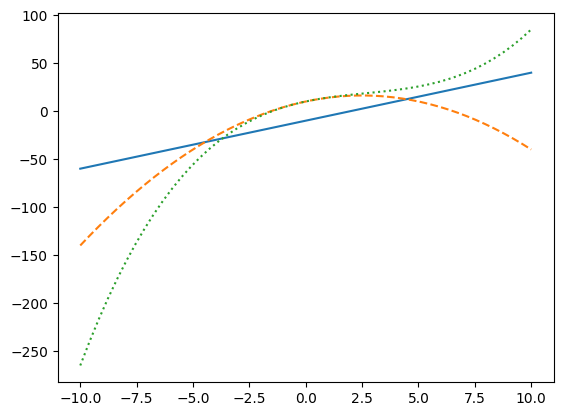

In [32]:
plt.figure()
plt.plot(xx1, yy_linear)
plt.plot(xx1, yy_parabola, ls="--")
plt.plot(xx1, yy_terceiro_grau, ls=":")

### Estilos de marcador 

Podemos especificar os marcadores com `marker=`, fornecendo uma string com o especificador. Os mais comuns são:

* `'s'` para um quadrado (*square*)
* `'o'` para um círculo
* `'*'` para uma estrela
* `'v'` `'>'` `'<'^` `'^'` para triângulos
* `'p'` para um pentágono

### Legendas

Se quiser especificar um nome a uma linha, utilize `label=` em `plt.plot` e depois chame a função `plt.legend()` para criar a caixa da legenda na figura.

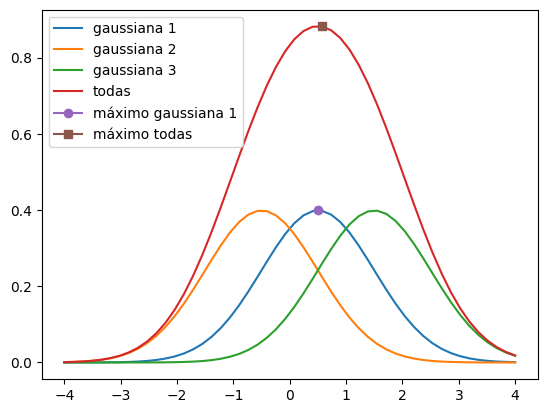

In [33]:
plt.figure()
plt.plot(xx3, yy_gauss_1, label="gaussiana 1")
plt.plot(xx3, yy_gauss_2, label="gaussiana 2")
plt.plot(xx3, yy_gauss_3, label="gaussiana 3")
plt.plot(xx3, yy_gauss_todos, label="todas")
plt.plot(mu, yy_gauss_1_max, marker="o", label="máximo gaussiana 1")
plt.plot(xx_gauss_todos_max, yy_gauss_todos_max, marker="s", label="máximo todas")
plt.legend()

Note que, na legenda, `máximo gaussiana 1` possui um marcador com uma linha como seu símbolo. Isso é porque não especificamos que a linha deveria ter tamanho 0 (efetivamente removendo-a). Note também que os máximos aparentam estar um pouquinho deslocado, e isso se deve à limitação da precisão dos pontos na curva, cuja rugosidade pode ser notada, especialmente no topo. Além disso, resista a tentação de chamar `plt.scatter` para criar esse tipo de notação (curvas sem linhas) porque o propósito dessa função é ligeiramente diferente.

Podemos especificar a cor tanto da linha quanto do marcador com `color=` ou `c=`, e o valor sendo um [nome](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py), uma cor do ciclo (começando com `'C0'`), uma string com o código hexadecimal da cor (`#XXXXXX`) ou uma cor de 1 letra (`'b'` para azul, `'g'` para verde, etc). Se quiser especificar a cor dos marcadores, utilize `markerfacecolor=` ou `mfc=` para mudar a cor do centro e `markeredgecolor` ou `mec=` para mudar a cor da borda. A espessura da linha e do contorno do marcador são especificadas com `linewidth=` ou `lw=` e `markeredgewidth=` ou `mew=`. O tamanho do marcador é especificado com `markersize=` ou `ms=`.

### Nomeação de eixos e título de figura

Para nomear os eixos, você pode utilizar `plt.xlabel` e `plt.ylabel`. O título de uma figura é modificado com `plt.title`. Em todas as partes que envolvem texto, você pode utilizar notação $\LaTeX$ para expandir as capacidades tipográficas e colocar equações, envolvendo os comandos em `$`. Não se esqueça de utilizar uma *raw string* para evitar problemas com caracteres de escape e comandos de $\LaTeX$.

### Escalas

Se quiser mudar a escala de um eixo, utilize `plt.xscale` ou `plt.yscale`, junto com `'linear'` para escala linear e `'log'` para escala logaritmica, e outras.

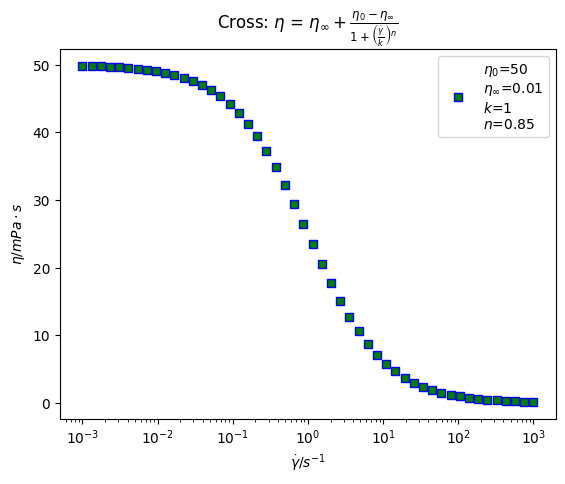

In [34]:
plt.figure()
plt.plot(
    xx4,
    yy_cross,
    lw=0,
    marker="s",
    mec="b",
    mfc="g",
    label="\n".join([r"$\eta_0$=50", r"$\eta_\infty$=0.01", r"$k$=1", r"$n$=0.85"]),
)
plt.xlabel(r"$\dot{\gamma} / s^{-1}$")
plt.ylabel(r"$\eta / mPa\cdot s$")
plt.xscale("log")
plt.title(r"Cross: $\eta$ = $\eta_\infty + \frac{\eta_0 - \eta_\infty}{1 + \left( \frac{\dot{\gamma}}{k} \right)^n }$")
plt.legend()

### Posição de *ticks*

Podemos especificar a posição e o texto dos *ticks* dos eixos x e y com `plt.xticks` e `plt.yticks`. Se utilizar o argumento `minor=True` para `plt.xticks` ou `plt.yticks`, você especificará se o comando se refere aos *ticks* principais (*major*) ou aos secundários (*minor*), e você pode tranquilamente utilizar o comando para especificar cada um. 

Você também pode utilizar `plt.grid` para adicionar linhas que saem dos *ticks*, e `which=` possui um papel similar ao argumento `minor=`, mas aqui precisamos especificar `which='minor'` para aplicar o *grid* aos *ticks* secundários.

Por padrão, um eixo tenta mostrar todo o conteúdo presente nele, mas a função tangente explode sob certos valores. Podemos limitar a área de visualização com `plt.xlim` e `plt.ylim`.

(-1.1, 1.1)

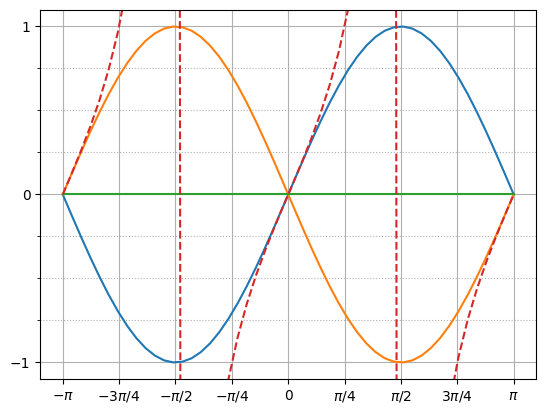

In [35]:
plt.figure()
plt.plot(xx2, yy_per1)
plt.plot(xx2, yy_per2)
plt.plot(xx2, yy_canc)
plt.plot(xx2, yy_tan, ls="--")


plt.xticks(
    ticks=np.arange(-np.pi, np.pi + 0.1, np.pi / 4),
    labels=[
        r"$-\pi$",
        r"$-3\pi/4$",
        r"$-\pi/2$",
        r"$-\pi/4$",
        r"0",
        r"$\pi/4$",
        r"$\pi/2$",
        r"$3\pi/4$",
        "$\pi$",
    ],
)
plt.yticks(ticks=np.arange(-1, 1.1, 1))
plt.yticks(ticks=np.arange(-0.75, 0.76, 0.25), minor=True)
plt.grid()
plt.grid(which="minor", ls=":")
plt.ylim(-1.1, 1.1)

Note que, na função tangente, quando ela transiciona de positivo para negativo, uma linha foi traçada em nosso gráfico. Esse é sempre o comportamento de `plt.plot`. Se quiser remover essas linhas, a maneira mais simples é utilizando vários comandos de plotagem sequenciais. Isso será mostrado em uma seção futura.


### Definição customizada de legendas

Para criar uma legenda com marcadores específicos, você pode fornecer uma lista de *handles* e outra de *labels*. Os *handles* podem vir de comandos de plotagem, ou da criação de artistas diretamente, não relacionados diretamente com a figura em si.

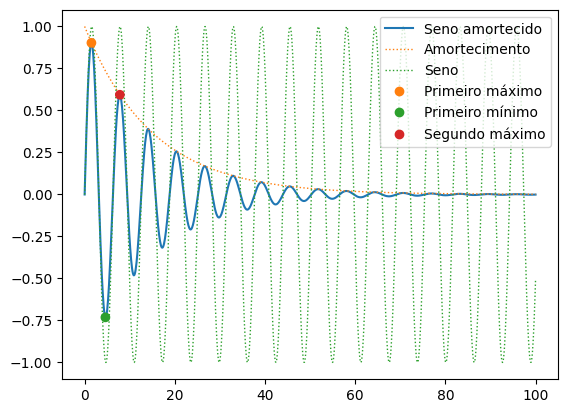

In [36]:
x = np.linspace(0, 100, num=1000)
y1 = np.exp(-x / 15)
y2 = np.sin(x)
y = y1 * y2

fig, ax = plt.subplots()

l_total = ax.plot(x, y)
l_exp = ax.plot(x, y1, ls=":", lw=1)
l_seno = ax.plot(x, y2, ls=":", lw=1)
scatter = ax.scatter(
    [x[np.argmax(y)], x[np.argmin(y)], x[78]],
    [np.max(y), np.min(y), y[78]],
    c=["C1", "C2", "C3"],
    zorder=2,
)

# Criação de artistas Line2D, que precisam de uma lista de X e Y, mas que
# não afetará em nada o resultado.
from matplotlib.lines import Line2D

l1 = Line2D([0], [0], marker="o", c="C1", lw=0)
l2 = Line2D([0], [0], marker="o", c="C2", lw=0)
l3 = Line2D([0], [0], marker="o", c="C3", lw=0)

ax.legend(
    [l_total[0], l_exp[0], l_seno[0], l1, l2, l3],
    [
        "Seno amortecido",
        "Amortecimento",
        "Seno",
        "Primeiro máximo",
        "Primeiro mínimo",
        "Segundo máximo",
    ],
)

(sec:basicos_np_2)=
## Básicos de `numpy` Parte 2

### Submódulo `random`

Existem várias funções dentro do módulo random. Elas fornecem números aleatórios de determinadas distribuições estatísticas. Por exemplo, `.random` retorna um `float` entre 0 e 1 (último não incluso), de uma distribuição uniforme. Se você quiser testar algo com uma chance de, p.e., 20%, você pode chamar essa função e checar se o valor obtido for menor que 0.2. Similarmente, `.randint` retorna um número inteiro entre dois intervalos, distribuídos uniformemente.

Vamos visualizar essas funções construindo histogramas.

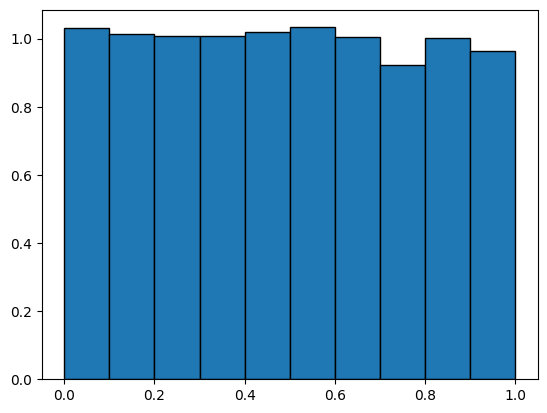

In [37]:
np.random.seed(42)
vals = np.random.random(size=10000)
_ = plt.hist(vals, density=True, edgecolor="k")

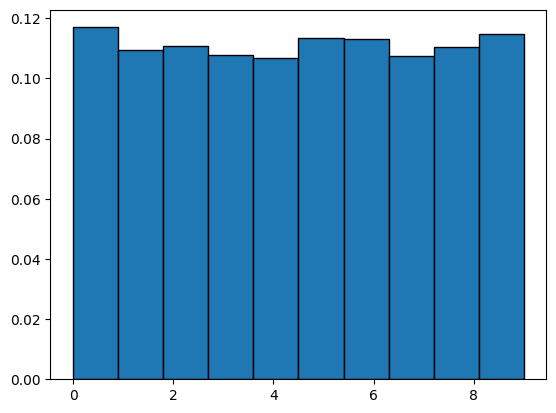

In [38]:
np.random.seed(42)
vals = np.random.randint(0, 10, size=10000)
_ = plt.hist(vals, density=True, edgecolor="k")

Podemos ver que em ambos os casos, os valores obtidos estão próximos à uniformidade. Eu também fixei o resultado ao forçar a semente do gerador de números pseudoaleatórios, e portanto os gráficos resultantes serão sempre iguais. Se você remover essa linha, verá que as curvas mudam a cada execução da célula, como é esperado.

Além de valores com distribuição uniforme, temos funções para distribuições estatísticas, como uma gaussiana, distribuição t de Student, chi-quadrado, e várias outras.

* `.randn` retorna valores de uma distribuição normal padrão (média zero, desvio padrão 1).

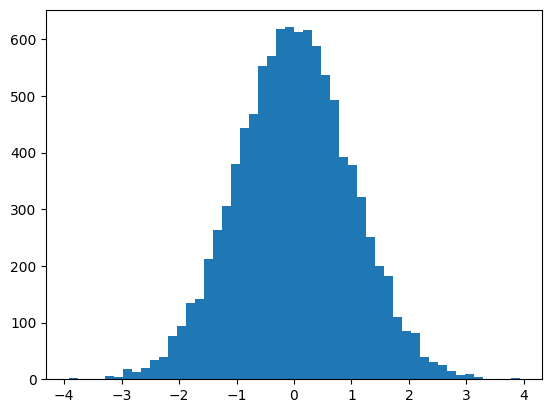

In [39]:
np.random.seed(42)
_ = plt.hist(np.random.randn(10000), bins=50)

* `.normal` é similar a `.randn`, mas é possível especificar a posição e largura da curva.

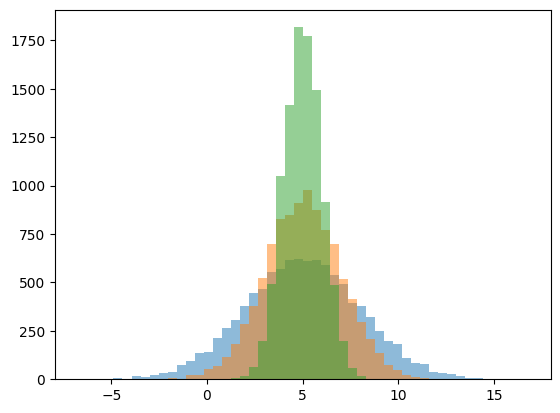

In [40]:
np.random.seed(42)
n, bins, containers = plt.hist(np.random.normal(loc=5, scale=3, size=10000), bins=50, alpha=0.5)
_ = plt.hist(np.random.normal(loc=5, scale=2, size=10000), bins=bins, alpha=0.5)
_ = plt.hist(np.random.normal(loc=5, scale=1, size=10000), bins=bins, alpha=0.5)

Aqui eu usei o fato da função `plt.hist` retornar os valores de cada coluna, as bordas de cada coluna e um container com os artistas de coluna para poder manter a mesma binagem de um histograma para o outro.

Aqui podemos ver como a distribuição t de Student difere com o aumento do número de graus de liberdade, e como ela se aproxima da distribuição normal quando o número de graus de liberdade aumenta. Neste caso, eu decidi utilizar a função `np.histogram` para calcular as contagens e bordas dos histogramas e plotar gráficos de linha, para facilitar a visualização. Note que quando temos *n* bins num histograma, sempre temos *n+1* bordas. Por essa razão, eu decidi plotar as contagens considerando que elas se referem ao valor central dessas bordas. Fiz isso com a média do valor da esquerda e da direita, de uma maneira compacta. Veja se você consegue entender porque isso funciona.

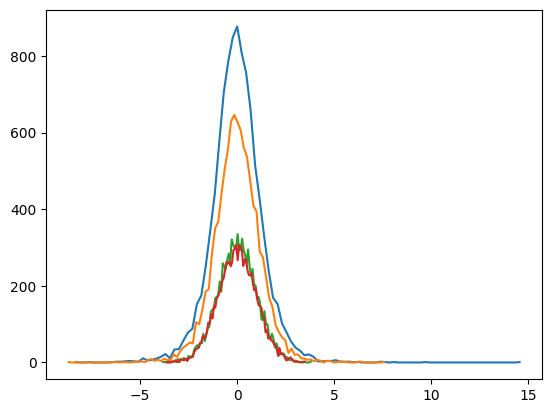

In [41]:
np.random.seed(42)
hist_df5, edges_df5 = np.histogram(np.random.standard_t(df=5, size=10000), bins=100)
hist_df15, edges_df15 = np.histogram(np.random.standard_t(df=7, size=10000), bins=100)
hist_df200, edges_df200 = np.histogram(np.random.standard_t(df=200, size=10000), bins=100)
hist_norm, edges_norm = np.histogram(np.random.standard_normal(size=10000), bins=100)

plt.plot((edges_df5[1:] + edges_df5[:-1]) / 2, hist_df5)
plt.plot((edges_df15[1:] + edges_df15[:-1]) / 2, hist_df15)
plt.plot((edges_df200[1:] + edges_df200[:-1]) / 2, hist_df200)
plt.plot((edges_norm[1:] + edges_norm[:-1]) / 2, hist_norm)

Existem mais funções estatísticas, com distribuições cumulativas, inversas, etc, no pacote `scipy.stats`, que será explorado depois.

Por fim temos a oportunidade de escolher elementos aleatoriamente de uma lista com `.choice`. Essa função aceita o número de elementos (`size`), e se eles serão amostrados com reposição ou não (`replace`). Note que se não puderem ser reamostrados, `size` não pode ser maior que o tamanho total da lista.

Aqui iremos criar uma amostra dos caracteres de caixa baixa, utilizando a biblioteca `string` como fonte da lista. Note que foi necessário converter `str` para uma lista para podermos usar essa função.

In [42]:
import string

np.random.seed(42)
print(np.random.choice(list(string.ascii_lowercase), size=10, replace=False))
np.random.seed(42)
print(np.random.choice(list(string.ascii_lowercase), size=10, replace=True))

['i' 'q' 'a' 'y' 'l' 'j' 'n' 'b' 'x' 'f']
['g' 't' 'o' 'k' 'h' 'u' 'g' 'z' 's' 'w']


Podemos também simular um [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) utilizando essa função. Esse método lhe permite calcular, por exemplo, regiões de confiança de estatísticas que não necessariamente seguem a distribuição normal ou similar a normal. Essa técnica depende em realizar uma amostragem, com reposição, muitas vezes e criar uma distribuição da estatística que você quiser calcular.

Primeiro iremos gerar uma população com uma média e desvio padrão conhecida, e depois iremos calcular esse valor médio por amostragem, e obter uma região de confiança, utilizando a função `np.percentile`.

Bootstrap média 10.06. Faixa de confiança 90%: [8.61, 11.44]


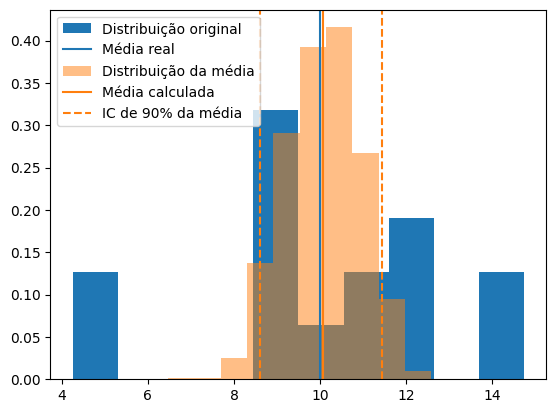

In [43]:
np.random.seed(42)
média = 10
desvpad = 3
amostra = np.random.normal(loc=média, scale=desvpad, size=15)
bootstraps = [np.mean(np.random.choice(amostra, size=10, replace=True)) for _ in range(1000)]
pct_5 = np.percentile(bootstraps, 5)
pct_95 = np.percentile(bootstraps, 95)
media = np.mean(bootstraps)
print(f"Bootstrap média {media:.2f}. Faixa de confiança 90%: [{pct_5:.2f}, {pct_95:.2f}]")

*_, cols_distrib = plt.hist(amostra, density=True)
l1 = plt.axvline(média, c="C0")
*_, cols_bootstrap = plt.hist(bootstraps, alpha=0.5, density=True)
l2 = plt.axvline(pct_5, c="C1", ls="--")
l3 = plt.axvline(pct_95, c="C1", ls="--")
l4 = plt.axvline(media, c="C1")

_ = plt.legend(
    [cols_distrib, l1, cols_bootstrap, l4, l2],
    [
        "Distribuição original",
        "Média real",
        "Distribuição da média",
        "Média calculada",
        "IC de 90% da média",
    ],
)

Surpreendente como o valor estimado é próximo ao valor real, não é? Eu fiquei muito surpreso quando me deparei com essa técnica pela primeira vez. Dizem que essa é a maneira preferida de fazer estatística por "aqueles que não sabem estatística". Sinceramente, isso é muito mais simples de fazer e lembrar que decorar as fórmulas, p.e., de distribuição *t* e comparações de médias. 

### Máscaras, indexação avançada

Quando temos arrays contendo dados experimentais, pode ser útil tratar parte desses dados de formas diferentes. Podemos utilizar máscaras para trabalhar com partes diferentes de uma image. Uma máscara é um *array* com o mesmo formato de outro *array*, contendo somente booleanos.

Vamos agora criar um *array* com valores aleatórios e remover os valores negativos.

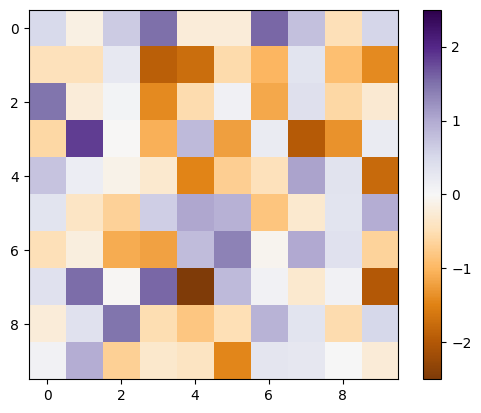

In [44]:
np.random.seed(42)
nums = np.random.normal(size=(10, 10))
mappable = plt.imshow(nums, cmap="PuOr", vmin=-2.5, vmax=2.5)
plt.colorbar(mappable)

Aqui utilizei `plt.imshow` para criar uma figura onde cada pixel será mostrado individualmente. Especifiquei um mapa de cor, `cmap`, que possui um ponto intermediário claro e dois extremos escuros, facilitando a compreensão de se um pixel possui número positivo ou negativo. Especifiquei `vmin` e `vmax` para que o mapa de cor seja simétrico.

Essa função retorna um objeto que permite mapear valores a cores, `mappable`. Para adicionar a barra de cor (uma tarefa estranhamente muito mais complicada que deveria ser), é preciso passar um `mappable`.

Agora vamos criar uma máscara somente para os valores positivos.

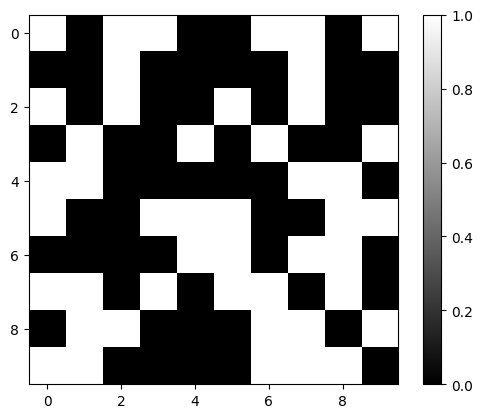

In [45]:
mascara = nums > 0
mappable = plt.imshow(mascara, cmap="gray")
plt.colorbar(mappable)

Comparando essa máscara à imagem anterior, podemos ver que as regiões correspondem muito bem. Além disso, note que o *array* booleano foi interpretado como um *array* de zeros e uns.

Vamos agora substituir todos os pontos **negativos** por zero. Primeiro, precisamos inverter essa máscara. Para isso podemos utilizar o operador bit-a-bit `~`, de negação.

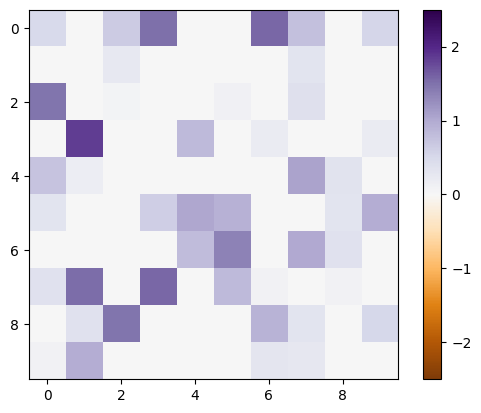

In [46]:
mascara_inv = ~mascara  # inversão
nums_pos = nums.copy()
nums_pos[mascara_inv] = 0

mappable = plt.imshow(nums_pos, cmap="PuOr", vmin=-2.5, vmax=2.5)
plt.colorbar(mappable)

Essa mesma ação pode ser feita com outras funções. `np.clip` limita valores de um *array* para um intervalo. Vamos repetir o exemplo anterior.

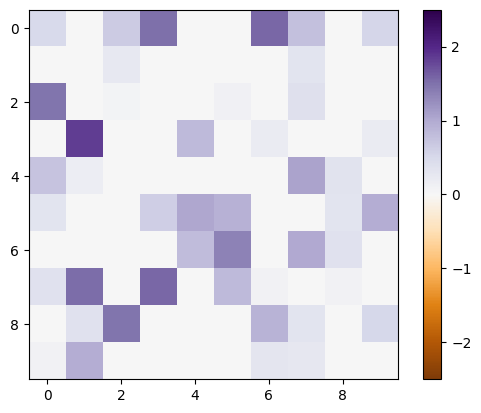

In [47]:
nums_pos = np.clip(nums, 0, np.inf)
mappable = plt.imshow(nums_pos, cmap="PuOr", vmin=-2.5, vmax=2.5)
plt.colorbar(mappable)

`np.where` permite que você combine dois *arrays* com base em um *array* de booleanos. Quando forem verdadeiros, os valores do primeiro *array* são escolhidos, e quando falsos, o segundo será escolhido. Vejamos isso em ação.

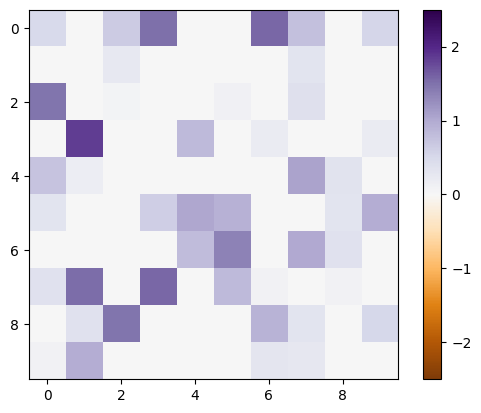

In [48]:
nums_pos = np.where(nums > 0, nums, 0)
mappable = plt.imshow(nums_pos, cmap="PuOr", vmin=-2.5, vmax=2.5)
plt.colorbar(mappable)

Alternativamente, poderíamos escolher outros valores, como o quadrado do número, caso desejado. Note como isso seria um pouco chato de se fazer manualmente, porque seria necessário dois loops aninhados (para linhas e colunas), ou um loop sobre o *array* planificado.

### Mudança de ordem

Existem funções para organizar *arrays* de diferentes formas. Vamos ver uma que pode ser circunstancialmente útil, `flip`, `flipud`, `fliplr`, que espelham um *array* sobre certo eixo, e `rot90`, que rotaciona um `array` 90 graus por `k` vezes. `fliplr` e `flipud` são somente `flip` com argumentos diferentes para o eixo onde a operação será realizada. Para isso, vamos criar uma imagem com um gradiente diagonal. Depois, vamos aplicar essas operações na matriz resultante.

Text(0.5, 0.5, 'rot90')

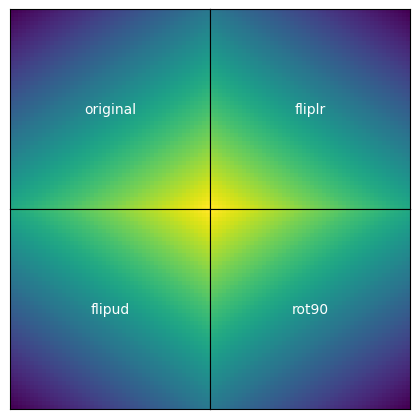

In [49]:
x = np.linspace(0, 10)
y = np.linspace(0, 10)
xx, yy = np.meshgrid(x, y)
zz = 2 * xx + 3 * yy

# Vamos aqui criar uma figura e especificar os eixos manualmente.
# Note como a notação para muitas das operações é ligeiramente diferente
# do que na hora de utilizar a notação implícita com `plt`.
fig = plt.figure(figsize=(4, 4))
ax_orig = fig.add_axes((0, 0.5, 0.5, 0.5))
ax_fliplr = fig.add_axes((0.5, 0.5, 0.5, 0.5))
ax_flipud = fig.add_axes((0, 0, 0.5, 0.5))
ax_rot90 = fig.add_axes((0.5, 0, 0.5, 0.5))

axes = [ax_orig, ax_fliplr, ax_flipud, ax_rot90]
for ax in axes:
    ax.set(xticks=[], yticks=[])

ax_orig.imshow(zz)
ax_fliplr.imshow(np.fliplr(zz))
ax_flipud.imshow(np.flipud(zz))
ax_rot90.imshow(np.rot90(zz, k=-2))  # k=2 ou k=-2 são equivalentes

fontdict = dict(color="white")
ax_orig.text(
    0.5,
    0.5,
    "original",
    ha="center",
    va="center",
    transform=ax_orig.transAxes,
    fontdict=fontdict,
)
ax_fliplr.text(
    0.5,
    0.5,
    "fliplr",
    ha="center",
    va="center",
    transform=ax_fliplr.transAxes,
    fontdict=fontdict,
)
ax_flipud.text(
    0.5,
    0.5,
    "flipud",
    ha="center",
    va="center",
    transform=ax_flipud.transAxes,
    fontdict=fontdict,
)
ax_rot90.text(
    0.5,
    0.5,
    "rot90",
    ha="center",
    va="center",
    transform=ax_rot90.transAxes,
    fontdict=fontdict,
)

A função `np.roll` move um *array* para uma direção, transportando os valores que saem dos limites do *array* para o outro lado. Vejamos um exemplo.

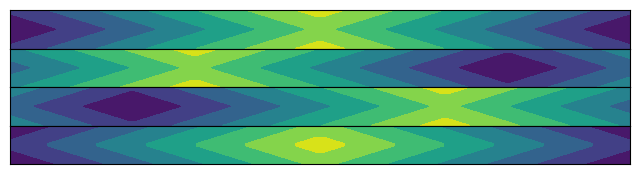

In [50]:
x = np.linspace(-5, 5, num=100)
y = np.linspace(-1, 1, num=20)
xx, yy = np.meshgrid(x, y)
zz = np.abs(xx) * -1 + np.max(xx) + np.abs(yy)

# Notação explícita/orientada a objetos para criação de figuras.
fig, axs = plt.subplots(
    nrows=4,
    ncols=1,
    figsize=(8, 2),
    sharex=True,
    sharey=True,
    gridspec_kw=dict(hspace=0),
)
axs[0].contourf(xx, yy, np.roll(zz, 0, axis=1))
axs[1].contourf(xx, yy, np.roll(zz, -20, axis=1))
axs[2].contourf(xx, yy, np.roll(zz, +20, axis=1))
axs[3].contourf(xx, yy, np.roll(zz, 10, axis=0))
for ax in axs:
    ax.set(xticks=[], yticks=[])

Primeiro, foi criado o *meshgrid* como nos exemplos anteriores. O valor de `zz` foi escolhido para ter um formato bem característico e angular. Uma figura e um conjunto de eixos foram criados e sobrepostos utilizando `plt.subplots`, que possui algumas funções convenientes para juntar eixos, sem ter que declará-los todos independentemente, como no exemplo anterior. Depois, `zz` foi rolado em direções distintas (note que valores positivos e negativos ditam a direção em um eixo) e em eixos distintos.

Temos também funções para ordenar *arrays*. A função `np.sort` faz isso, retornando uma cópia do *array*, e também permite selecionar o algoritmo de ordenação e o eixo. Isso é diferente da função embutida em python, que não possui essa funcionalidade. Novamente, opte por escolher funções do `numpy` quando realizar operações com objetos de `numpy`, para garantir maior velocidade e, mais importante, garantir resultados esperados.

In [51]:
np.random.seed(42)
arr = np.random.randint(0, high=10, size=10)
print(np.sort(arr))

[2 3 4 4 6 6 6 7 7 9]


In [52]:
np.random.seed(0)
arr2D = np.random.randint(0, high=20, size=(4, 4))
print(arr2D, "Original\n")
print(np.sort(arr2D, axis=-1), "Axis=-1\n")  # axis=-1 equivale, neste caso, a axis=1, o último eixo (colunas)
print(np.sort(arr2D, axis=1), "Axis=1\n")
print(np.sort(arr2D, axis=0), "Axis=0\n")
print(np.sort(arr2D, axis=None), "Axis=None\n")  # axis=None planifica o *array*

[[12 15  0  3]
 [ 3  7  9 19]
 [18  4  6 12]
 [ 1  6  7 14]] Original

[[ 0  3 12 15]
 [ 3  7  9 19]
 [ 4  6 12 18]
 [ 1  6  7 14]] Axis=-1

[[ 0  3 12 15]
 [ 3  7  9 19]
 [ 4  6 12 18]
 [ 1  6  7 14]] Axis=1

[[ 1  4  0  3]
 [ 3  6  6 12]
 [12  7  7 14]
 [18 15  9 19]] Axis=0

[ 0  1  3  3  4  6  6  7  7  9 12 12 14 15 18 19] Axis=None



Além de `np.sort`, existe `np.argsort`, que retorna os índices que iriam ordenar um *array*.

In [53]:
np.argsort(arr2D, axis=1)

array([[2, 3, 0, 1],
       [0, 1, 2, 3],
       [1, 2, 3, 0],
       [0, 1, 2, 3]], dtype=int64)

Para melhor entender esse resultado, primeiro lembre-se que estamos ordenando por colunas, ou seja, em uma linha estamos ordenando-a da direita para a esquerda. A tabela a seguir mostra, para a primeira linha, os índices de cada elemento e suas posições. Note como a coluna de "Índice inicial" é igual ao resultado.

 <table>
  <tr>
    <th>Elemento</th>
    <th>Índice inicial</th>
    <th>Índice final</th>
  </tr>
  <tr>
    <td>0</td>
    <td>2</td>
    <td>0</td>
  </tr>
  <tr>
    <td>3</td>
    <td>3</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12</td>
    <td>0</td>
    <td>2</td>
  </tr>
  <tr>
    <td>15</td>
    <td>1</td>
    <td>3</td>
  </tr>
</table> 

Se quisermos, podemos ordenar o *array* original com essa ordem, mas necessitando a função `np.take_along_axis`.

In [54]:
pos = np.argsort(arr2D, axis=1)
np.take_along_axis(arr2D, pos, axis=1)

array([[ 0,  3, 12, 15],
       [ 3,  7,  9, 19],
       [ 4,  6, 12, 18],
       [ 1,  6,  7, 14]])

Uma utilidade para isso é ordenar um *array* com base em outro. Por exemplo, se temos valores de *x* e *y* correlacionados, mas precisamos, por alguma razão, ordenar *x*. Se não ordenarmos *y*, a correlação irá sumir. Um exemplo um pouco bobo é a função de plotar com junção de pontos com uma linha. No comportamento habitual, cada ponto adjacente é ligado por uma reta. Porém, se os pontos estiverem desordenados, o resultado será uma curva ininteligível. Vejamos um exemplo.

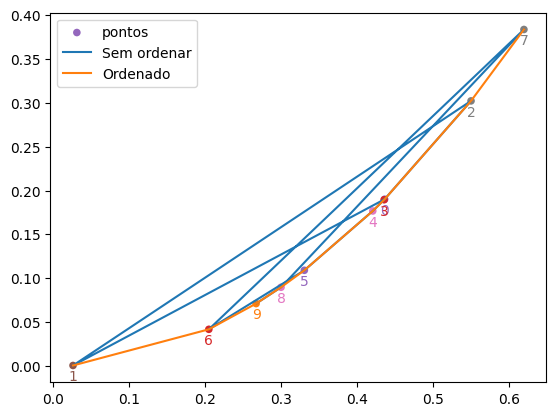

In [55]:
np.random.seed(2)
x = np.random.random(size=10)
y = x**2

indices_ordem = np.argsort(x)
# Por ser *arrays* de 0 dimensões, podemos ordená-las
# tomando os indices diretamente, ao invés de utilizar take_along_axis
x_ordenado = x[indices_ordem]
y_ordenado = y[indices_ordem]

# Cores para colocar nos pontos e texto para facilitar compreensão
cores = np.random.choice(list(f"C{i}" for i in range(len(x))), size=len(x), replace=True)
plt.scatter(x, y, lw=0, marker="o", s=30, label="pontos", c=cores)
plt.plot(x, y, label="Sem ordenar")
plt.plot(x_ordenado, y_ordenado, label="Ordenado")
for i, (x, y) in enumerate(zip(x, y)):
    plt.text(x, y - 0.005, i, ha="center", va="top", color=cores[i])
plt.legend()

### Junção e partição de *arrays*

Além de criar *arrays* do zero, podemos combiná-las:
* `np.column_stack` (igual a `np.hstack`), `np.row_stack` (igual a `np.vstack`) empilham *arrays* em certas dimensões. Geralmente são aplicados a *arrays* de até 3 dimensões.
* `np.dstack`, `np.stack` empilham *arrays* em diversas direções, gerando novas dimensões.
* `np.concatenate` junta *arrays* numa direção sem adicionar uma dimensão nova.

In [56]:
a1 = np.ones((2, 3))
a2 = np.ones((2, 3)) * 2
a3 = np.ones(3) * 3
a4 = np.ones(3) * 4

print(np.vstack((a1, a2)), "vstack\n")
print(np.row_stack((a3, a4)), "row_stack\n")

print(np.hstack((a1, a2)), "hstack\n")
print(np.column_stack((a3, a4)), "column_stack\n")

print(np.dstack((a1, a2)), "dstack\n")

print(np.concatenate((a1, a2), axis=1), "concatenate\n")
print(np.concatenate((a3, a4), axis=0), "concatenate\n")

[[1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [2. 2. 2.]] vstack

[[3. 3. 3.]
 [4. 4. 4.]] row_stack

[[1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2.]] hstack

[[3. 4.]
 [3. 4.]
 [3. 4.]] column_stack

[[[1. 2.]
  [1. 2.]
  [1. 2.]]

 [[1. 2.]
  [1. 2.]
  [1. 2.]]] dstack

[[1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 2. 2. 2.]] concatenate

[3. 3. 3. 4. 4. 4.] concatenate



De vez em quando, podemos querer adicionar ou remover uma dimensão. Isso pode ser feito com `np.expand_dims` e `np.squeeze`, respectivamente. Ambas adicionam ou removem uma dimensão com tamanho 1.

In [57]:
print(np.expand_dims(a1, axis=0), np.expand_dims(a1, axis=0).shape, "expand_dims axis=0\n")
print(np.expand_dims(a1, axis=1), np.expand_dims(a1, axis=1).shape, "expand_dims axis=1\n")

print(np.expand_dims(a3, axis=0), np.expand_dims(a3, axis=0).shape, "expand_dims axis=0\n")
print(np.expand_dims(a3, axis=1), np.expand_dims(a3, axis=1).shape, "expand_dims axis=1\n")

a5 = np.array([[1, 2, 3, 4, 5, 6]])
print(a5, a5.shape, "Array com uma dimensão de 1 elemento (1 linha)")
print(np.squeeze(a5), np.squeeze(a5).shape, "Array com essa dimensão removida")

[[[1. 1. 1.]
  [1. 1. 1.]]] (1, 2, 3) expand_dims axis=0

[[[1. 1. 1.]]

 [[1. 1. 1.]]] (2, 1, 3) expand_dims axis=1

[[3. 3. 3.]] (1, 3) expand_dims axis=0

[[3.]
 [3.]
 [3.]] (3, 1) expand_dims axis=1

[[1 2 3 4 5 6]] (1, 6) Array com uma dimensão de 1 elemento (1 linha)
[1 2 3 4 5 6] (6,) Array com essa dimensão removida


Podemos também particionar *arrays* com `np.split` e seus similares, `np.hsplit`, `np.vsplit`, `np.dsplit`. Essas funções aceitam índices ou seções onde o *array* deve ser particionado. Anteriormente, mostrei a curva da tangente de uma série de números, com um detalhe feio em que os pontos de "infinito positivo" e "infinito negativo" estavam sendo conectados. Podemos separar os *arrays* com `np.split`.

Primeiro, utilizamos `np.argwhere` para encontrar os índices onde o valor absoluto da diferença entre valores (aproximadamente uma derivada) é maior que um valor alto arbitrário, aqui escolhido como 5. Por algum motivo, o valor é um vetor coluna, então a dimensão extra foi removida com `np.squeeze`.

In [58]:
x = np.linspace(0, 2 * np.pi, num=500)
y = np.tan(x)
indices_para_split = np.squeeze(np.argwhere((np.abs(np.diff(y)) > 5)))
indices_para_split

array([121, 122, 123, 124, 125, 126, 127, 128, 370, 371, 372, 373, 374,
       375, 376, 377], dtype=int64)

(Note que o mesmo poderia ser feito com `np.where` ou `np.nonzero`, com mudanças pequenas na notação).

Depois disso, seccionamos os *arrays* com base nesses índices e plotamos as seções separadas. Isso irá, sim, criar plots com 1 ponto só, mas para motivos ilustrativos, isso não é um problema.

(-3.0, 3.0)

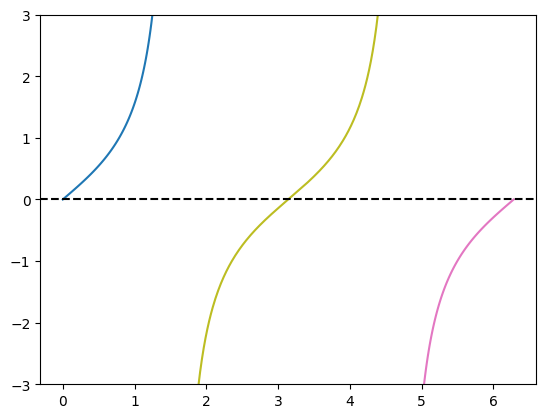

In [59]:
splits_y = np.split(y, indices_para_split)
splits_x = np.split(x, indices_para_split)
for sx, sy in zip(splits_x, splits_y):
    plt.plot(sx, sy)
plt.axhline(0, c="k", ls="--")
plt.ylim(-3, 3)

### Regressão linear

Uma das coisas mais básicas e úteis para um cientista é a regressão linear, que é da área de álgebra linear. Uma regressão linear encontra os coeficientes de uma equação do tipo:

$$
\hat{y}(x_1) = b_0 + b_1 x_1
$$

onde $\hat{y}$ é o valor esperado para a observação, $b_n$ é um coeficiente e $x_n$ é uma variável independente. Essa equação pode ser generalizada para $n$ variáveis independentes:

$$
\hat{y}(x_1, x_2, \cdots, x_n) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

Em termos matriciais, podemos escrever essa equação como:

$$
\hat{\mathbf{y}} = \mathbf{X}\mathbf{b}
$$

onde $\hat{\mathbf{y}}$ é o vetor coluna de *valor previsto*

$$
\hat{\mathbf{y}} =
    \begin{bmatrix}
        \hat{y}_1 \\
        \hat{y}_2 \\
        \vdots \\
        \hat{y}_n \\
    \end{bmatrix}
$$


$\mathbf{X}$ é uma matrix onde cada linha contém as variáveis independentes de uma observação

$$
\mathbf{X} = 
    \begin{bmatrix}
        1 & x_{1,1} & x_{2, 1} & \cdots & x_{1, m}\\
        1 & x_{2,1} & x_{2, 2} & \cdots & x_{2, m}\\
        \vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x_{n, 1} & x_{n, 2} & \cdots & x_{n, m}\\
    \end{bmatrix}
$$

Aqui, $x_{m,n}$ indica a m-ésima observação da n-ésima variável independente. Para o caso simples, com somente uma variável independente, temos

$$
\mathbf{X} = 
    \begin{bmatrix}
        1 & x_{1,1}  \\
        1 & x_{2,1}  \\
        \vdots & \vdots \\
        1 & x_{n,1}\\
    \end{bmatrix}
$$

A coluna de uns é necessária para representar o intercepto, que é independente do valor de $x$. 

$\mathbf{b}$ é o vetor coluna contendo os coeficientes:

$$
\mathbf{b} = 
    \begin{bmatrix}
        b_0 \\
        b_1 \\
        \vdots \\
        b_n
    \end{bmatrix}
$$

Onde temos $n+1$ coeficientes para $n$ variáveis independentes e $1$ para o intercepto. Para o caso simples, 

$$
\mathbf{\hat{b}} = 
    \begin{bmatrix}
        \hat{b}_0 \\
        \hat{b}_1 \\
    \end{bmatrix}
$$

O objetivo da regressão linear é encontrar $\mathbf{b}$ de tal forma que $\hat{\mathbf{y}}$ seja muito próximo de $\mathbf{y}$, o vetor coluna de observações. Sem me ater às nuances, a solução é dada por:

$$
\hat{b} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

Vamos agora criar um exemplo artificial para mostrar essa equação em ação, utilizando as funções `np.linalg.inv` para criar a inversa de uma matriz, a propriedade `.T` que retorna a transposta e o operador `@`, que realiza multiplicação matricial.

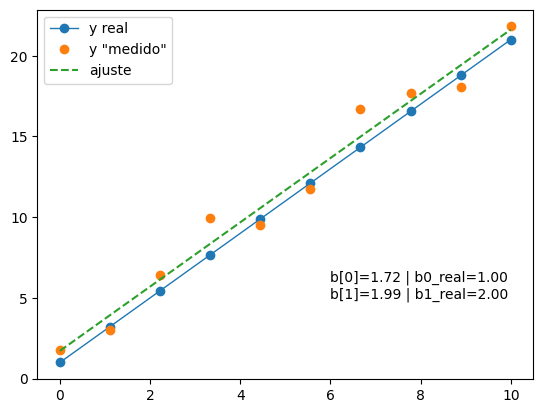

In [60]:
np.random.seed(42)
x = np.linspace(0, 10, num=10)
b0_real = 1
b1_real = 2
y_real = b0_real + b1_real * x
y_ruido = np.random.normal(scale=1.5, size=y_real.size) + y_real

X = np.column_stack([np.ones_like(y_ruido), x])
b = np.linalg.inv(X.T @ X) @ X.T @ y_ruido

plt.plot(x, y_real, label="y real", lw=1, marker="o")
plt.plot(x, y_ruido, label='y "medido"', lw=0, marker="o")
plt.plot(x, X @ b, label="ajuste", ls="--")
plt.text(6, 5, f"{b[0]=:.2f} | {b0_real=:.2f}\n{b[1]=:.2f} | {b1_real=:.2f}")
plt.legend()

Podemos ver que a estimativa para $b_1$ foi boa, mas $b_0$ foi bastante ruim. Existe uma função que consegue realizar tudo isso, sem necessitar de relembrar toda a equação de regressão, `np.linalg.lstsq`. Essa função retorna os coeficientes, a soma do quadrado dos resíduos (igual a $\sum (y_i - \hat{y}_i)^2$), o posto matricial e os valores singulares de $b$.

In [61]:
b, SQ_res, posto, val_sing_b = np.linalg.lstsq(X, y_ruido, rcond=None)
print(np.isclose(((y_ruido - X @ b) ** 2).sum(), SQ_res))

[ True]


Podemos calcular o famoso $R^2$, que calcula a "diferença" de um modelo frente uma reta horizontal, por meio de 

$$
R^2 = \frac{
    \sum (\hat{y}_i - \bar{y})^2
}{
    \sum (y_i - \bar{y})^2
} = 1 - \frac{
    \sum (y_i - \hat{y}_i)^2
}{
    \sum (y_i - \bar{y})^2
}
$$

onde $\bar{y}$ é o valor médio de $y$. Note que já temos pré-calculado o termo no nominador da equação à direita, e necessitamos somente calcular o denominador.


In [62]:
R2 = 1 - SQ_res / ((y_ruido - np.mean(y)) ** 2).sum()
R2

array([0.9940466])

Dependendo para quem você perguntar, este é um bom valor, mas varia muito de área para área e técnica para técnica.

Podemos prosseguir com a análise desta regressão pelo cálculo do intervalo de confiança de $b_0$ e $b_1$. Primeiro, calculamos a variância de y não modelado, no caso de inexistência de replicatas, por:

$$
s_y^2 = \frac{
    \sum (y_i - \hat{y}_i)^2
    }{
    m - p
    }
$$

onde o numerador é a soma do quadrado dos resíduos, $m$ é, novamente, o número de amostras e $p$ é o número de parâmetros no modelo (2 no caso atual). Essa grandeza também é conhecida como MSE, ou *mean square error*.

In [63]:
var_y = SQ_res / (x.size - b.size)
var_y

array([1.32208346])

Segundo, temos que a matriz de covariância $\mathbf{b}^2$ é data por

$$
\mathbf{s}_b^2 = s_y^2 \left[ \mathbf{X}^T \mathbf{X} \right]^{-1} = \begin{bmatrix}
    s^2_{b_0} & s^2_{b_0b_1} \\
    s^2_{b_1b_0} & s^2_{b_1} \\
\end{bmatrix}
$$

As variâncias de $b_0$ e $b_1$ são dados pela raiz quadrada da diagonal dessa matriz de covariância. Geralmente é dado o nome de *erro padrão* para a rais quadrada das variâncias desses coeficientes.

In [64]:
cov = np.linalg.inv(X.T @ X) * var_y
err_padrao_b = np.sqrt(np.diag(cov))
err_padrao_b

array([0.67581043, 0.1139318 ])

Por fim, podemos calcular o intervalo de $b_0$ e $b_1$ com a estatística $t$ de Student. O número de graus de liberdade de uma regressão linear é $m$ amostras - $p$ parâmetros (2 neste caso).

In [65]:
graus_liberdade = x.size - b.size
graus_liberdade

8

O valor da estatística $t$ pode ser encontrada por tabelas ou por uma função do Scipy. O valor para um nível de confiança de 95% bicaudal e 8 graus de liberdade é `2.306`, que podemos confirmar com a função `scipy.stats.t.ppf`. Não se preocupe pela especificidade, isso será abordado com mais detalhes no futuro.

In [66]:
fator_t = sp.stats.t.ppf(0.975, df=graus_liberdade)
fator_t

2.3060041350333704

Por fim então, temos que o intervalo de confiança de $b_0$ e $b_1$ são:

In [67]:
b0_intervalo = (b[0] - fator_t * err_padrao_b[0], b[0] + fator_t * err_padrao_b[0])
b1_intervalo = (b[1] - fator_t * err_padrao_b[1], b[1] + fator_t * err_padrao_b[1])
b0_intervalo, b1_intervalo

((0.16024752235333795, 3.277090830475338),
 (1.7279572884888217, 2.2534117079646965))

Veja como o intervalo de confiança de $b_0$ é enorme, justificando seu valor tão diferente do esperado teórico.

O intervalo de confiança da curva em si pode ser calculada de uma maneira similar.

$$
\hat{y_i} \pm t_{\alpha / 2} s_y \sqrt{\mathbf{x_i}^T \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{x}_i}
$$

onde $\mathbf{x}_i$ é a i-ésima linha de $\mathbf{X}$. Convenientemente, o termo dentro da raiz quadrada é dado pela diagonal da matriz chapéu $\mathbf{H}$:

$$
\mathbf{H} = \mathbf{X} \left(\mathbf{X}^T \mathbf{X}\right) \mathbf{X}^T
$$

In [68]:
matriz_chapeu = X @ np.linalg.inv(X.T @ X) @ X.T

Os termos da diagonal são chamados de influências:

In [69]:
influencias = np.sqrt(np.diag(matriz_chapeu))

E por fim calculamos o termo à direita da equação do intervalo de confiança da regressão e podemos plotá-la ao redor da curva obtida.

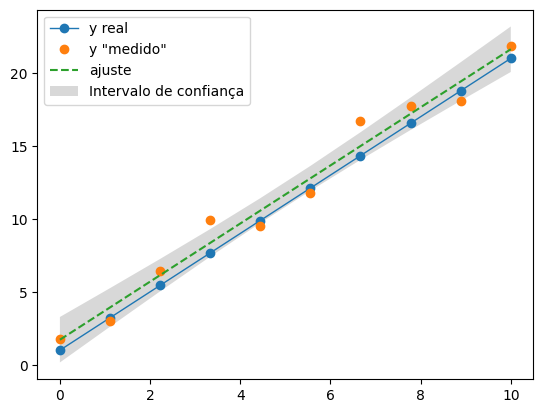

In [70]:
y_erro = fator_t * influencias * np.sqrt(var_y)
y_previsto = X @ b

plt.plot(x, y_real, label="y real", lw=1, marker="o")
plt.plot(x, y_ruido, label='y "medido"', lw=0, marker="o")
plt.plot(x, y_previsto, label="ajuste", ls="--")
plt.fill_between(
    x,
    y_previsto - y_erro,
    y_previsto + y_erro,
    alpha=0.3,
    color="gray",
    edgecolor=None,
    label="Intervalo de confiança",
)
plt.legend()

Por fim, existem muitos mais coisas que podem ser calculadas e consideradas num ajuste linear, e fogem do escopo deste material.

### Exportação e importação

Eventualmente você irá precisar exportar *arrays* para outras aplicações. Por exemplo, *arrays* computacionalmente custosas de se calcular, mandar resultados para colegas, etc. Para isso temos algumas funções que permitem realizar justamente isso.

Primeiro, temos funções que trabalham com arquivos binários. São `np.load` e `np.save`. Vamos ver um teste. Aqui eu irei utilizar composição de funções para aninhar funções seno e criar algo mais inusitado.

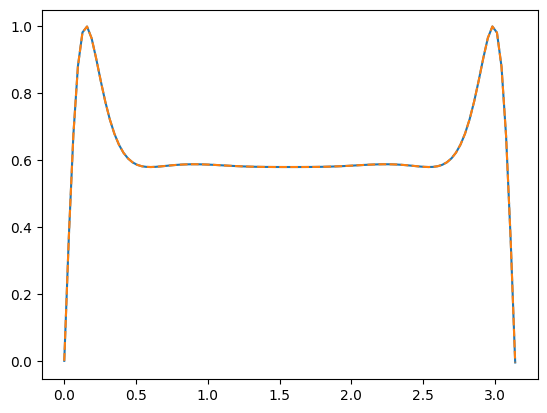

In [71]:
# https://stackoverflow.com/questions/16739290/composing-functions-in-python
import functools


def compose2(f, g):
    return lambda *a, **kw: f(g(*a, **kw))


thebat = functools.reduce(
    compose2,
    [
        np.sin,
        lambda x: 3 * x,
        np.sin,
        lambda x: 1 * x,
        np.sin,
        lambda x: 2 * x,
        np.sin,
        lambda x: 1 * x,
        np.sin,
        lambda x: 2 * x,
        np.sin,
        lambda x: 1 * x,
    ],
)
bat_x = np.linspace(0, 3.142, num=100)
bat_y = thebat(bat_x)
plt.plot(bat_x, bat_y)

np.save("bat_x.npy", bat_x)
np.save("bat_y.npy", bat_y)

novo_bat_x = np.load("bat_x.npy")
novo_bat_y = np.load("bat_y.npy")

plt.plot(novo_bat_x, novo_bat_y, ls="--")

Podemos também salvar como texto. Isso tem a vantagem de ser mais fácil de abrir e verificar o conteúdo, e também transferir para outras ferramentas, como Excel. 

In [72]:
np.savetxt("bat_x.txt", bat_x)
np.savetxt("bat_y.txt", bat_y)

Podemos ver o conteúdo com facilidade também. Compare o resultado

In [73]:
print(*open("bat_y.npy", "rb").read(64), "\n")
print(*open("bat_y.txt").readlines()[:10])
print(bat_y[:10])

147 78 85 77 80 89 1 0 118 0 123 39 100 101 115 99 114 39 58 32 39 60 102 56 39 44 32 39 102 111 114 116 114 97 110 95 111 114 100 101 114 39 58 32 70 97 108 115 101 44 32 39 115 104 97 112 101 39 58 32 40 49 48 48 

0.000000000000000000e+00
 3.692919742752678314e-01
 6.752838471502985440e-01
 8.802274896517543468e-01
 9.807008481130035094e-01
 9.982743897679540179e-01
 9.633878179803021524e-01
 9.031779964343428224e-01
 8.365125600762475244e-01
 7.741527420246925306e-01

[0.         0.36929197 0.67528385 0.88022749 0.98070085 0.99827439
 0.96338782 0.903178   0.83651256 0.77415274]


Há uma fácil correlação entre o conteúdo do arquivo `.txt` com o conteúdo do *array* em si. Mas o conteúdo do arquivo `.npy` é binário, e seria necessário interpretar tais números para conseguirmos entender o valor real.

Por fim, vamos deletar os arquivos para não poluir nosso ambiente de trabalho.

In [74]:
import os

os.unlink("bat_x.npy")
os.unlink("bat_y.npy")
os.unlink("bat_x.txt")
os.unlink("bat_y.txt")

*Arrays* também possuem funções para salvar binários e texto, com uma sintaxe similar, mas não possuem função para ler.

## Básicos de `scipy`

A biblioteca `scipy` possui um grande conjunto de algoritmos voltados à comunidade científica. Eles são divididos em subpacotes para cada funcionalidade. Irei passar muito brevemente em cada pacote para descrever o conteúdo e mostrar um exemplo ou outro de aplicação.

### `scipy.constants`

[Link da documentação](https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants)

Esse pacote contém constantes matemáticas, algumas com unidades.

In [75]:
(
    sp.constants.e,
    sp.constants.pi,
    np.pi,
    sp.constants.c,  # m/s
    sp.constants.epsilon_0,  # F/m == C/(Vm)
    sp.constants.g,  # m/s2
    sp.constants.R,  # J/(K mol)
    sp.constants.N_A,
    sp.constants.k,  #
)

(1.602176634e-19,
 3.141592653589793,
 3.141592653589793,
 299792458.0,
 8.8541878128e-12,
 9.80665,
 8.314462618,
 6.02214076e+23,
 1.380649e-23)

Também possui uma lista com valores nomeados. Podemos procurar por uma constante por nome:

In [76]:
sp.constants.find("electron")

['alpha particle-electron mass ratio',
 'atomic mass unit-electron volt relationship',
 'classical electron radius',
 'deuteron-electron mag. mom. ratio',
 'deuteron-electron mass ratio',
 'electron charge to mass quotient',
 'electron g factor',
 'electron gyromag. ratio',
 'electron gyromag. ratio in MHz/T',
 'electron mag. mom.',
 'electron mag. mom. anomaly',
 'electron mag. mom. to Bohr magneton ratio',
 'electron mag. mom. to nuclear magneton ratio',
 'electron mass',
 'electron mass energy equivalent',
 'electron mass energy equivalent in MeV',
 'electron mass in u',
 'electron molar mass',
 'electron relative atomic mass',
 'electron to alpha particle mass ratio',
 'electron to shielded helion mag. mom. ratio',
 'electron to shielded proton mag. mom. ratio',
 'electron volt',
 'electron volt-atomic mass unit relationship',
 'electron volt-hartree relationship',
 'electron volt-hertz relationship',
 'electron volt-inverse meter relationship',
 'electron volt-joule relationship',

E depois pegar seu valor, unidade e incerteza com estas funções.

In [77]:
sp.constants.physical_constants["electron mass in u"]

(0.000548579909065, 'u', 1.6e-14)

In [78]:
(
    sp.constants.value("electron mass in u"),
    sp.constants.unit("electron mass in u"),
    sp.constants.precision("electron mass in u"),
)

(0.000548579909065, 'u', 2.916621577933908e-11)

E tem também prefixos e unidades.

In [79]:
(
    sp.constants.kilo,  # 10^3
    sp.constants.kibi,  # 2^10
    sp.constants.pound,  # massa de 1 libra em kg,
    sp.constants.degree,  # 1 grau em radianos
    sp.constants.Julian_year,  # 1 ano, com o 1/4 de dia, em segundos
    sp.constants.nautical_mile,  # 1 milha náutica em metros,
    sp.constants.bar,  # 1 bar em pascal
    sp.constants.gallon,  # 1 galão em litros,
    sp.constants.knot,  # 1 nó em m/s
    sp.constants.convert_temperature(25, "Kelvin", "Rankine"),  # Função que converte entre escalas
    sp.constants.eV,  # 1 eletron volt em joule
)

(1000.0,
 1024,
 0.45359236999999997,
 0.017453292519943295,
 31557600.0,
 1852.0,
 100000.0,
 0.0037854117839999997,
 0.5144444444444445,
 45.0,
 1.602176634e-19)

### `scipy.cluster.hierarchy`

[Link da documentação](https://docs.scipy.org/doc/scipy/reference/cluster.html)

Este pacote possui algumas funções para agregação de valores. Vou utilizar isso para mostrar como criar um dendrograma. Primeiro, vamos fabricar alguns dados. As linhas conterão amostras e as colunas variáveis, como de costume.

In [80]:
np.random.seed(42)
prop1 = np.random.randint(1, 10, size=(10, 1)).astype(float)
prop2 = np.sort(np.random.normal(size=(10, 1)), axis=0)
prop3 = np.exp(prop1 / 10)
props = np.column_stack([prop1, prop2, prop3])
props

array([[ 7.        , -0.92918467,  2.01375271],
       [ 4.        , -0.7679765 ,  1.4918247 ],
       [ 8.        , -0.53181741,  2.22554093],
       [ 5.        , -0.42779291,  1.64872127],
       [ 7.        , -0.1595165 ,  2.01375271],
       [ 3.        , -0.1174755 ,  1.34985881],
       [ 7.        ,  0.02222183,  2.01375271],
       [ 8.        ,  0.07983181,  2.22554093],
       [ 5.        ,  0.2220789 ,  1.64872127],
       [ 4.        ,  0.39257975,  1.4918247 ]])

Agora vamos ligar esses dados com base na distância euclidiana, método completo (maior distância).

In [81]:
links = sp.cluster.hierarchy.linkage(props, method="complete", metric="euclidean")

Para visualizar isso, existe a função `sp.cluster.hierarchy.dendrogram`.

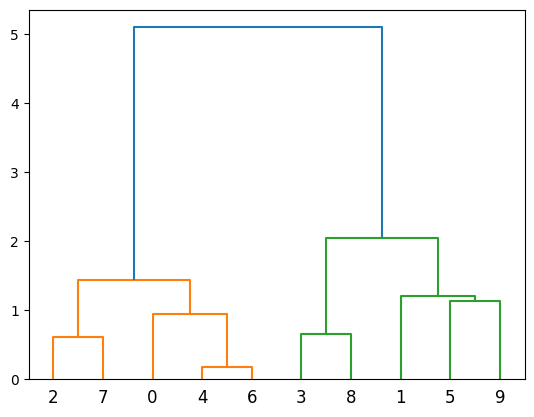

In [82]:
_ = sp.cluster.hierarchy.dendrogram(links)

Note aqui que eu não fiz a padronização dos dados com base na média e desvio padrão. Se quiser, você pode procurar como fazer isso depois, tanto manualmente como por meio de ferramentas como `sklearn.preprocessing.StandardScaler`.

### `scipy.fft`

Este pacote possui funções para realizar transformadas de Fourier discretas, e funções auxiliares. De uma maneira muito simplificada, uma transformada de Fourier converte um sinal no domínio do tempo em um conjunto de senos e cossenos com frequências que reproduzem esse sinal original. Vamos ver um exemplo disso em prática e depois como isso poderia ser utilizado para "limpar" um sinal.

Primeiro vamos criar um sinal arbitrário.

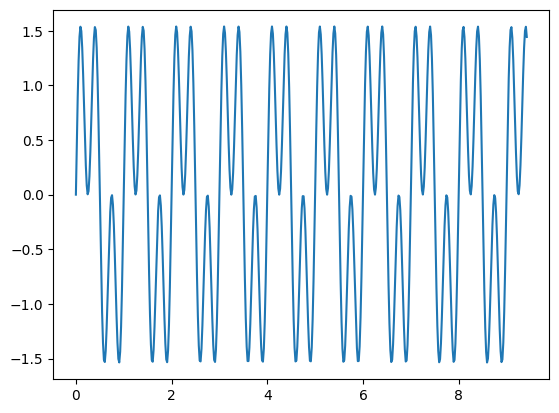

In [83]:
x = np.linspace(0, 3 * np.pi, num=500)
freq1 = 1
freq2 = 3
y = np.sin(2 * np.pi * freq1 * x) + np.sin(2 * np.pi * freq2 * x)
plt.plot(x, y)

Agora vamos calcular a transformada de Fourier desse sinal. Para plotar o resultado, precisamos calcular tanto a intensidade e pegar somente a parte real, quanto calcular as frequências associadas a esses sinais. Tais tarefas são realizadas por `scipy.fft.fft` e `scipy.fft.fftfreq`. A resposta não é contínua em torno de zero e gera um "buraco" no gráfico. Para resolver isso, utilizamos a função `fftshift`, que nada mais utiliza a função `np.roll`, abordada anteriormente.

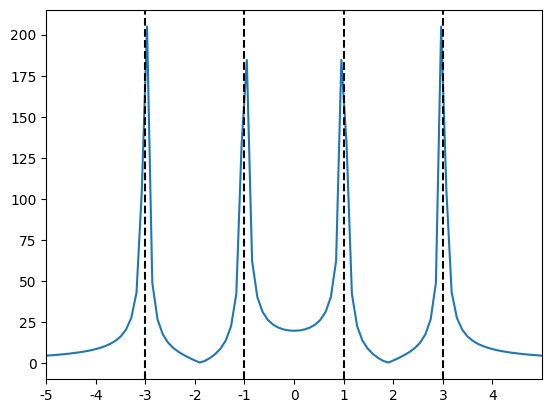

In [84]:
fft = sp.fft.fftshift(sp.fft.fft(y))
# d é o espaçamento de x. Como este foi obtido de linspace, que tem um espaçamento homogêneo,
# utilizei a diferença dos dois primeiros termos.
freqs = sp.fft.fftshift(sp.fft.fftfreq(y.size, d=x[1] - x[0]))
plt.plot(freqs, np.abs(fft))
plt.xlim(-5, 5)
plt.axvline(freq1, ls="--", c="k")
plt.axvline(freq2, ls="--", c="k")
plt.axvline(-freq1, ls="--", c="k")
plt.axvline(-freq2, ls="--", c="k")
_ = plt.xticks(range(-5, 5), range(-5, 5))

Como podemos ver, o resultado possui picos exatamente nas frequências estabelecidas, e é espelhado em torno de zero. Utilizar a função `ifft` retorna o resultado ao domínio original. Mas precisamos desfazer o *shift* anterior com `ifftshift`.

C:\Users\karl9\miniconda3\envs\cursoPython\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


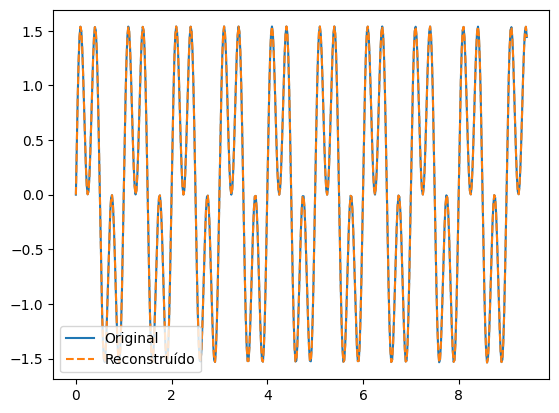

In [85]:
novo_y = sp.fft.ifft(sp.fft.ifftshift(fft))
plt.plot(x, y, label="Original")
plt.plot(x, novo_y, ls="--", label="Reconstruído")
plt.legend()

Vamos agora utilizar essa função para "limpar" um sinal ruidoso utilizando uma técnica conhecida como "filtro passa baixa". Primeiro vamos gerar um decaimento exponencial com um ruído aleatório por todo ele.

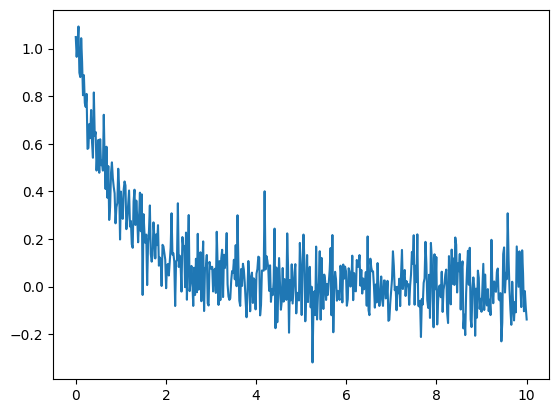

In [86]:
np.random.seed(42)
x = np.linspace(1e-3, 10, num=500)
y = np.exp(-x) + np.random.normal(size=x.shape, scale=0.1)
plt.plot(x, y)

Agora realizamos a transformada de Fourier, da mesma maneira que antes.

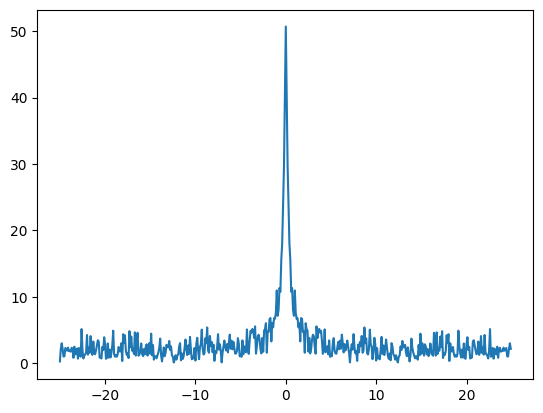

In [87]:
fft = sp.fft.fftshift(sp.fft.fft(y))
freqs = sp.fft.fftshift(sp.fft.fftfreq(y.size, d=x[1] - x[0]))
plt.plot(freqs, np.abs(fft))

E filtramos as frequências maiores que um certo valor. Aqui, escolhi 3, mas isso vai do gosto do freguês, e removi com uma máscara.

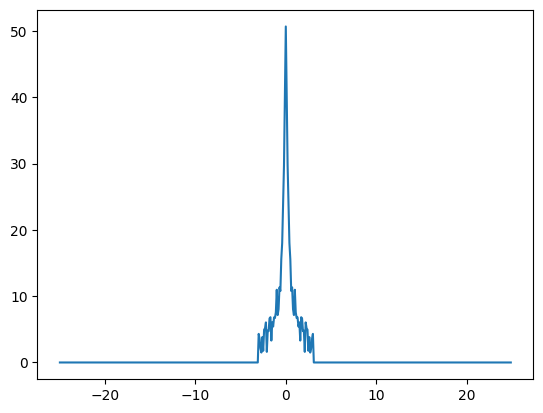

In [88]:
fft[(freqs < -3) | (freqs > 3)] = 0
plt.plot(freqs, np.abs(fft))

Por fim fazemos a inversa da transformada de Fourier e comparamos com o dado original. O resultado nas bordas não é lá muito bom, mas no centro dessa curva, foi bom. Este tipo de problema também pode ser feito com transformadas de Laplace, que possuem um benefício de podermos estabelecer a função que iremos tentar compor o dado, não dependendo somente de senos e cossenos.

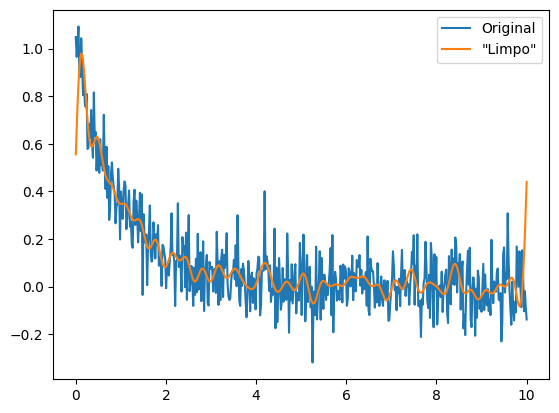

In [89]:
novo_y = sp.fft.ifft(sp.fft.ifftshift(fft))
plt.plot(x, y, label="Original")
plt.plot(x, novo_y, label='"Limpo"')
plt.legend()

### `scipy.integrate`

[Link da documentação](https://docs.scipy.org/doc/scipy/reference/integrate.html)

Esse pacote contém funções para integração e resolução de equações diferenciais. Irei mostrar somente um pouco da funcionalidade de integração.

Primeiro, podemos integrar uma função em Python em um intervalo definido. Por exemplo:

In [90]:
def f(x):
    return 2 * x


sp.integrate.quad(f, 0, 10)

(100.0, 1.1102230246251565e-12)

Se você fornecer uma integral que não converge, uma mensagem de aviso irá aparecer.

In [91]:
def f(x):
    return 1 / x


sp.integrate.quad(f, 0, 1)

C:\Users\karl9\AppData\Local\Temp\ipykernel_3344\2682117281.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sp.integrate.quad(f, 0, 1)


(41.67684067538809, 9.35056037314051)

Porém, se você possuir os dados e deseja integrar, por exemplo, quando você mediu algum resultado, é melhor utilizar a função `scipy.integrate.trapezoid`.

In [92]:
x = np.linspace(0, 10, num=50)
sp.integrate.trapezoid((lambda x: 2 * x)(x), dx=x[1] - x[0])

100.00000000000001

Ambos os resultados podem ser verificados diretamente. A integral indefinida de 

$$
f(x) = 2 x
$$

é

$$
\int f(x) = x^2 + C
$$

Se avaliarmos isso no intervalo de 0 a 10, a constante $C$ some, $0^2$ é $0$ e $10^2$ é 100.

## Exercícios resolvidos

### Gaussiana 2D

Procure na internet a definição de uma gaussiana multivariada. Simule um conjunto de partículas sobre uma superfície. Depois, utilizando técnicas de tratamento de imagens, tente separar isolar essas partículas e obtenha um raio aproximado delas.

#### Solução 

Uma possível definição para a gaussiana 2D está a seguir. Iremos simplificá-la, presumindo que a matriz de covariância não possui termos fora da diagonal.

$$
y = A \cdot \exp{\left(-\left(
        \frac{\left(x - \mu_x\right)^2}{2 \sigma_x ^ 2} +
        \frac{\left(y - \mu_y\right)^2}{2 \sigma_y ^ 2}
    \right)\right)
}
$$

Essa gaussiana 2D aceita as coordenadas de `x` e `y` e calcula uma altura para este par de coordenadas. Se fornecessemos uma matriz com pares de coordenadas, teríamos tecnicamente uma matriz de 3 dimensões, como esta:

$$
\begin{pmatrix}
    \left( 0,0 \right) & \left( 1,0\right) & \left( 2,0\right) \\
    \left( 0,1\right) & \left( 1,1\right) & \left( 2,1\right) \\
    \left( 0,2\right) & \left( 1,2\right) & \left( 2,2\right) \\
\end{pmatrix}
$$

Quando utilizarmos essa função, teríamos que separar `x` e `y` ao calcular a gaussiana 2D. O exemplo a seguir faz justamente isso.

In [93]:
def gauss_2d_v1(arr, A, centro_xy, sigma_xy):
    return A * np.exp(
        -(
            ((arr[:, :, 0] - centro_xy[0]) ** 2 / (2 * sigma_xy[0] ** 2))
            + ((arr[:, :, 1] - centro_xy[1]) ** 2 / (2 * sigma_xy[1] ** 2))
        )
    )

Porém, podemos fornecer duas matrizes 2D, cada uma contendo um "plano" da matriz original ou, em outras palavras, uma matriz contendo somente as coordenadas de `x`, que chamaremos de `xx` e outra só com as coordenadas de `y`, que chamaremos de `yy`.

$$
xx = 
\begin{pmatrix}
     0 &  1 &  2 \\
     0 &  1 &  2 \\
     0 &  1 &  2 \\
\end{pmatrix}
$$

e

$$
yy = 
\begin{pmatrix}
     0 & 0 &  0 \\
     1 &  1 &  1 \\
     2 &  2 &  2 \\
\end{pmatrix}
$$



In [94]:
def gauss_2d_v2(xx, yy, A, centro_xy, sigma_xy):
    return A * np.exp(
        -(((xx - centro_xy[0]) ** 2 / (2 * sigma_xy[0] ** 2)) + ((yy - centro_xy[1]) ** 2 / (2 * sigma_xy[1] ** 2)))
    )

Note que `xx` e `yy` possuem bastante informação redundante. Em `xx`, todas as colunas são iguais e em `yy`, todas as linhas são iguais. Poderíamos especificar `xx` e `yy` como um vetor que se repete algumas vezes, chamados `x` e `y`. Felizmente, a função `np.meshgrid` nos ajuda a fazer isso. Veja o seguinte exemplo:


In [95]:
x = np.arange(3)
y = np.arange(3)
xx, yy = np.meshgrid(x, y)
print(xx, "\n\n", yy)

[[0 1 2]
 [0 1 2]
 [0 1 2]] 

 [[0 0 0]
 [1 1 1]
 [2 2 2]]


Aqui conseguimos definir `xx` e `yy` partindo de algo bem simples. Se quisermos chegar à matriz que mencionamos inicialmente, podemos utilizar `np.dstack`, que empilha dois `arrays` na terceira dimensão.

In [96]:
xxyy = np.dstack((xx, yy))
print(xxyy)
print()
print(xxyy[:, :, 0], "\n\n", xxyy[:, :, 1])

[[[0 0]
  [1 0]
  [2 0]]

 [[0 1]
  [1 1]
  [2 1]]

 [[0 2]
  [1 2]
  [2 2]]]

[[0 1 2]
 [0 1 2]
 [0 1 2]] 

 [[0 0 0]
 [1 1 1]
 [2 2 2]]


Eu pessoalmente acho meio confusa a notação para mostrar a matriz 3D, mas veja que ela obedece os pares de números definidos acima, linha a linha.

Munidos agora desse conhecimento, vamos primeiramente criar uma matriz `z`, que contém duas gaussianas, a partir das matrizes `xx` e `yy` que tem valores que vão de 0 a 5.

In [97]:
x = np.linspace(0, 5, num=500)
y = np.linspace(0, 5, num=500)
xx, yy = np.meshgrid(x, y)
z = gauss_2d_v2(xx, yy, 1, (1, 1), (0.5, 0.5)) + gauss_2d_v2(xx, yy, 1, (3, 3), (0.5, 0.5))

Devemos ter essas gaussianas, uma com centro de (1, 1) e outra com centro em (3, 3). Vamos ver o resultado.

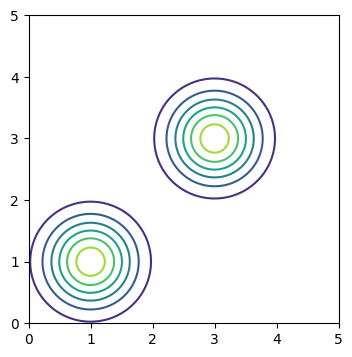

In [98]:
plt.figure(figsize=(4, 4))
plt.contour(xx, yy, z)

De fato conseguimos ver isso bem claramente nesta imagem. Se quisermos observar essa matriz como se fosse uma fotografia, podemos utilizar `plt.imshow`. Note, porém, que a origem do sistema de coordenada de matrizes e imagens geralmente é diferente. Matrizes iniciam no canto superior esquerdo e imagens no canto inferior esquerdo. Por essa razão, precisamos passar o *kwarg* `origin='lower'` para `plt.imshow`.

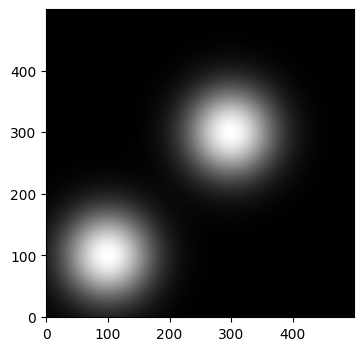

In [99]:
plt.figure(figsize=(4, 4))
plt.imshow(z, origin="lower", cmap="gray")

Os eixos, desta vez, se referem ao número de pontos. Como criamos `x` e `y` com 500 pontos cada, os eixos acabam indo de 0 a 500. Também passei o mapa de cor `cmap` de escala de cinza, `gray`. Podemos inclusive combinar ambas essas imagens. Dessa vez, vamos utilizar a primeira função que definimos.

([], [])

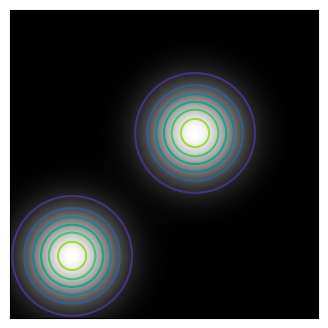

In [100]:
x = np.linspace(0, 5, num=500)
y = np.linspace(0, 5, num=500)
xx, yy = np.meshgrid(x, y)
xxyy = np.dstack((xx, yy))
z = gauss_2d_v1(xxyy, 1, (1, 1), (0.5, 0.5)) + gauss_2d_v1(xxyy, 1, (3, 3), (0.5, 0.5))

plt.figure(figsize=(4, 4))
plt.contour(z, origin="lower")
plt.imshow(z, origin="lower", cmap="gray")
plt.xticks([])
plt.yticks([])

Aqui, eu tirei os `ticks`, porque não carregam muita informação relevante.

Tendo isso, vamos criar uma imagem simulando um agrupamento de nanopartículas visualizadas por alguma técnica de microscopia. Para isso, vamos aleatorizar a posição delas e depois adicionar um ruído aleatório. Tal ruído será restringido somente a valores positivos com a função `np.clip`. Por último, irei reescalar essa imagem para se aproximar ao que é tipicamente utilizado no processamento de imagens, que é uma imagem de números entre 0 e 255 (8 bits).

([], [])

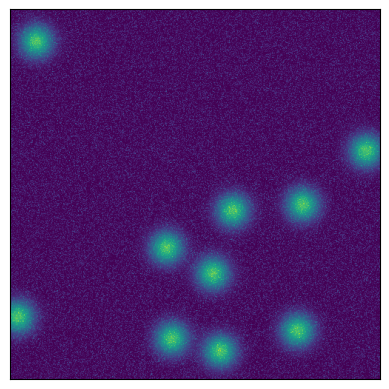

In [101]:
np.random.seed(0)
num_particulas = 10
num_pontos = 500
min_vals = 0
max_vals = 5
raio = 0.15
x = np.linspace(min_vals, max_vals, num=num_pontos)
y = np.linspace(min_vals, max_vals, num=num_pontos)
xx, yy = np.meshgrid(x, y)
z = np.zeros_like(xx)

for _ in range(num_particulas):
    part = gauss_2d_v2(
        xx,
        yy,
        1,
        (np.random.random() * max_vals, np.random.random() * max_vals),
        (0.15, 0.15),
    )
    z += part

z += np.clip(np.random.normal(0, 0.15, size=z.shape), 0, np.inf)

z = (z / z.max() * 200).astype(np.uint8)

plt.imshow(z)
plt.xticks([])
plt.yticks([])

Você pode ver que não existe um limite muito bem definido entre partícula e fundo. Separá-los é complicado. Esse é um problema bastante grande na área de processamento de imagens, mas aqui iremos fazer isso de maneira bastante simplificada. Primeiro, vamos ter uma ideia da concentração de valores de pixel para podermos decidir melhor sobre um valor de limite (*threshold*). Para isso, podemos plotar essa imagem como se fosse uma linha do início ao fim, para notarmos a altura aproximada das partículas.

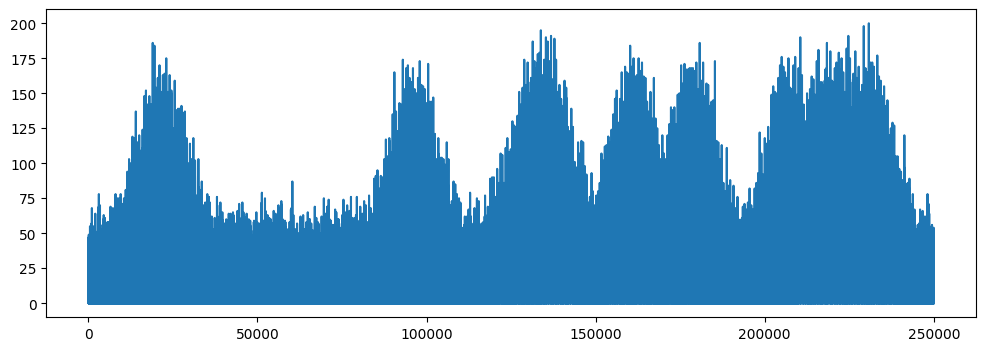

In [102]:
plt.figure(figsize=(12, 4))
plt.plot(z.ravel())

Parece que o fundo tem uma intensidade próxima de 75. Vamos ver o que ocorre se seccionarmos com o valor de 75. Para isso, criamos a máscara.

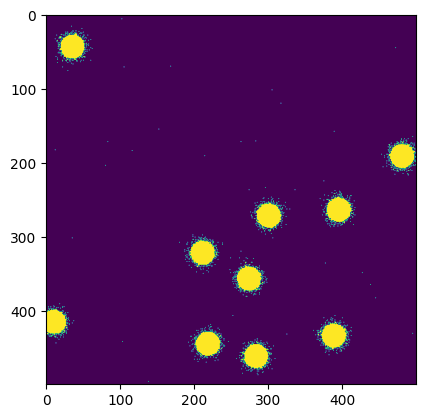

In [103]:
mascara = z > 75

plt.imshow(mascara)

Observe que temos vários pontos ao redor das partículas e no plano de fundo que não se referem às partículas, mas sim a ruído. Podemos remover esses pontos pequenos se fizermos uma operação de erosão seguida de uma operação de dilatação, que é chamado de *opening*. A erosão remove pontos que não estão no interior de formas, seja nas bordas de partículas ou pontos isolados. Isso remove uma camada das partículas, no entanto. Dilatação faz o processo contrário. Mas como os pontos isolados foram removidos completamente, não há como reaparecerem, então as partículas em si permanecem, mas os pontos isolados não.

Tais operações estão presentes no pacote `scipy.ndimage`.

In [104]:
import scipy.ndimage

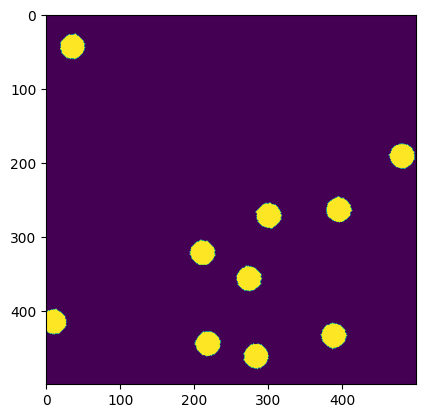

In [105]:
mascara_limpa = scipy.ndimage.binary_opening(
    mascara, iterations=3
)  # Variei o número de iterações até achar um resultado bom.
plt.imshow(mascara_limpa)

Como temos uma separação aparentemente boa, podemos numerar cada partícula com a função `.label`.

10


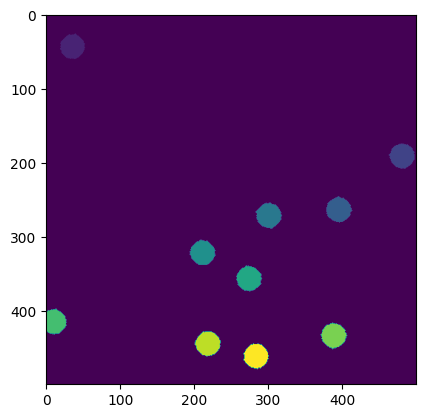

In [106]:
labels, num_particulas = scipy.ndimage.label(mascara_limpa)
plt.imshow(labels)
print(num_particulas)

Podemos agora obter as regiões que definem as partículas com `.find_objects`. Essa função retorna uma lista de *slices*. Podemos visualizar as partículas individuais com plots.

(35, 34)
(34, 35)
(36, 35)
(35, 36)
(34, 35)
(35, 35)
(35, 28)
(36, 36)
(34, 35)
(35, 34)


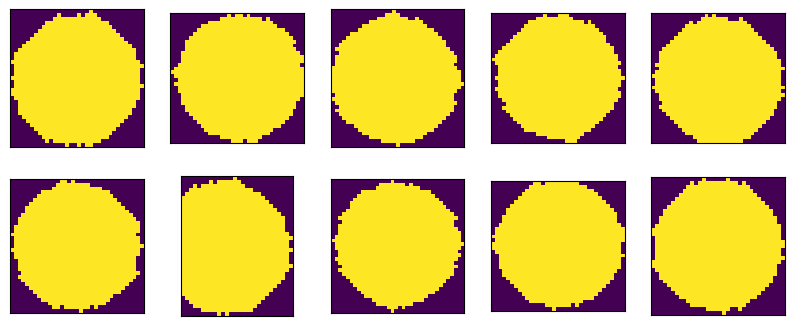

In [107]:
objetos = scipy.ndimage.find_objects(labels)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for obj, ax in zip(objetos, axs.ravel()):
    reg = labels[*obj]
    print(reg.shape)
    ax.imshow(reg)
    ax.set(xticks=[], yticks=[])

Por vim, vamos estimar o raio dessas partículas pela área delas, e presumindo que são todas esféricas.

[16.516403133234203, 16.679413674486074, 16.73656774376801, 16.784047463965738, 16.602902199168756, 16.688952945311364, 15.574085310927526, 16.698486766680407, 16.66031874701878, 16.56451393462626]


<BarContainer object of 10 artists>

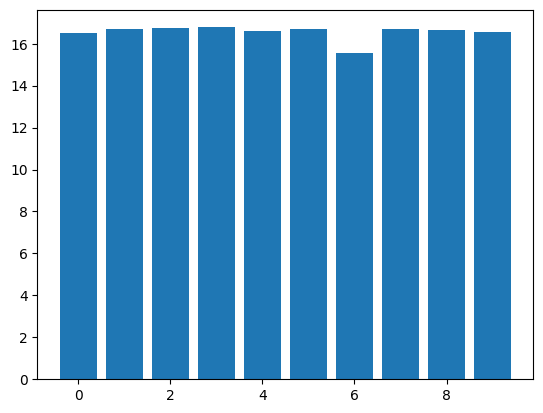

In [108]:
areas = [mascara_limpa[*obj].sum() for obj in objetos]
raios = [np.sqrt(A / np.pi) for A in areas]
print(raios)
plt.bar(range(len(raios)), raios)

Note que temos uma partícula com raio menor. Se você observar, ela estava na borda da imagem e, portanto, não forneceu uma medida apropriada. Vamos calcular a média de todas, e seu desvio padrão.

In [109]:
raios.pop(6)

15.574085310927526

In [110]:
print(
    f"""\
Média: {np.mean(raios)},
Mediana: {np.median(raios)},
Desvio Padrão: {np.std(raios)},
Intervalo de confiança de 95% ao redor da média: {scipy.stats.t.interval(df = len(raios) - 1, confidence=0.95, loc=np.mean(raios), scale=np.std(raios) / np.sqrt(len(raios)))}
    """
)

Média: 16.65906740091773,
Mediana: 16.679413674486074,
Desvio Padrão: 0.07953815948358475,
Intervalo de confiança de 95% ao redor da média: (16.597928959363703, 16.72020584247176)
    


### Planejamento de experimentos

Pesquise sobre planejamento de experimentos e sua relação com regressão linear. Monte uma matriz de planejamento fatorial completo $2^3$ com 3 pontos centrais, contendo todas as interações dos parâmetros. Considerando a seguinte matriz de respostas, calcule a estimativa do desvio, os coeficientes, e determine quais são os mais importantes por meio do cálculo do intervalo de confiança e por um gráfico normal. Depois, refaça o modelo removendo os coeficientes extras.
$$
\mathbf{y} = \begin{bmatrix}
 -1.7 \\
 18.3 \\
 -2.5 \\
 25.6 \\
 -5.8 \\
  5.1 \\
 -6.2 \\
 13.5 \\
 4.3  \\
 5.7  \\
 4.3  \\
 \end{bmatrix}
$$

#### Solução

Um planejamento fatorial é montado da seguinte maneira. Primeiro, definimos nossas variáveis de interesse e seus níveis. Vamos chamá-las de $\mathbf{1}$, $\mathbf{2}$, e suas interações de $\mathbf{12}$ e seus níveis de `-` para o extremo negativo e `+` para o extremo positivo, definidos previamente (p.e. queremos avaliar a concentração de permanganato 0.1 a 1 mM, 0.1 seria o nível `-` e 1 seria `+`).

Para um planejamento $2^3$, temos 3 variáveis $\mathbf{1}$, $\mathbf{2}$ e $\mathbf{3}$ com 2 níveis cada, $+$ e $-$. Para montar a matriz base, precisamos combinar todas as variáveis e níveis. Existe uma maneira algoritmicamente bem simples. Primeiro, pegamos a variável $\mathbf{1}$ e alternamos seus níveis 1 a 1. Depois, pegamos a variável $\mathbf{2}$ e fazemos o mesmo, mas alternando de 2 a 2. A variável $\mathbf{3}$ varia de 4 em 4. O total de variações é o número total de combinações, $2^3=8$.


In [111]:
var_1 = np.tile(np.repeat([-1, +1], 1), 4)
var_2 = np.tile(np.repeat([-1, +1], 2), 2)
var_3 = np.tile(np.repeat([-1, +1], 4), 1)
print(var_1, var_2, var_3, sep="\n")

[-1  1 -1  1 -1  1 -1  1]
[-1 -1  1  1 -1 -1  1  1]
[-1 -1 -1 -1  1  1  1  1]


Aqui, utilizei `np.tile` para repetir um *array* algumas vezes(`-, +` vira `-,+,-,+`) e `np.repeat` para "expandir" o *array* repetido (`-,+` vira `-,-,+,+`)[^1]. 

[^1]: Eu pessoalmente acho os nomes meio estranhos, mas é o que temos para hoje

Agora podemos calcular as interações entre termos pela multiplicação dessas variáveis. Então a interação de $\mathbf{1}$ e $\mathbf{2}$ é data pela multiplicação elemento-a-elemento, de `var_1` e `var_2`.

In [112]:
var_12 = var_1 * var_2
var_13 = var_1 * var_3
var_23 = var_2 * var_3
var_123 = var_1 * var_2 * var_3
print(var_12, var_13, var_23, var_123, sep="\n")

[ 1 -1 -1  1  1 -1 -1  1]
[ 1 -1  1 -1 -1  1 -1  1]
[ 1  1 -1 -1 -1 -1  1  1]
[-1  1  1 -1  1 -1 -1  1]


Por fim vamos juntar esses *arrays* para criar a matriz de planejamento que chamarei de $\mathbf{X}$. Irei adicionar uma coluna à esquerda com 1s para representar o intercepto.

In [113]:
X = np.column_stack([np.ones_like(var_1), var_1, var_2, var_3, var_12, var_13, var_23, var_123])
X

array([[ 1, -1, -1, -1,  1,  1,  1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1,  1, -1, -1],
       [ 1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1]])

E por fim vamos colocar as linhas do ponto central.

In [114]:
X = np.row_stack((X, np.array([1, 0, 0, 0, 0, 0, 0, 0])))
X = np.row_stack((X, np.array([1, 0, 0, 0, 0, 0, 0, 0])))
X = np.row_stack((X, np.array([1, 0, 0, 0, 0, 0, 0, 0])))
X

array([[ 1, -1, -1, -1,  1,  1,  1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1,  1, -1, -1],
       [ 1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0]])

Vamos agora transcrever a matriz de respostas:

In [115]:
y = np.array([[-1.7], [18.3], [-2.5], [25.6], [-5.8], [5.1], [-6.2], [13.5], [4.7], [5.3], [4.7]])

Com isso vamos calcular os coeficientes

In [116]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([[ 5.54545455],
       [ 9.8375    ],
       [ 1.8125    ],
       [-4.1375    ],
       [ 2.1125    ],
       [-2.1875    ],
       [ 0.1875    ],
       [ 0.0875    ]])

E a matriz de covariância é:

In [117]:
var_calc = np.var(y[-3:], ddof=1)
# ddof é 'delta degrees of freedom'. Como estamos calculando a estimativa amostral,
# temos N-1 no denominador (ddof = 1).
Cov = np.linalg.inv(X.T @ X) * var_calc
erros_padrao_b = np.sqrt(np.diag(Cov))
erros_padrao_b

array([0.10444659, 0.12247449, 0.12247449, 0.12247449, 0.12247449,
       0.12247449, 0.12247449, 0.12247449])

Como temos 8 parâmetros e 11 amostras, temos 3 graus de liberdade. Para um intervalo de confiança de 95%, temos o valor *t* de

In [118]:
valor_t = sp.stats.t.ppf(0.975, y.size - b.size)

In [119]:
regiao_conf_b = valor_t * erros_padrao_b

E assim podemos calcular se algum parâmetro é efetivamente igual a zero.

In [120]:
print(np.ravel(b), "\n", np.ravel(np.abs(b)) < np.ravel(np.abs(regiao_conf_b)))

[ 5.54545455  9.8375      1.8125     -4.1375      2.1125     -2.1875
  0.1875      0.0875    ] 
 [False False False False False False  True  True]


Isso indica que os coeficientes das interações $\mathbf{23}$ e $\mathbf{123}$ são pouco significativos. Vamos remontar a matrix $\mathbf{X}$ levando isso em conta e refazer os cálculos.

In [121]:
novo_X = X[:, :-2]
novo_X

array([[ 1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1],
       [ 1,  1,  1, -1,  1, -1],
       [ 1, -1, -1,  1,  1, -1],
       [ 1,  1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0]])

In [122]:
novo_b = np.linalg.inv(novo_X.T @ novo_X) @ novo_X.T @ y
novo_b

array([[ 5.54545455],
       [ 9.8375    ],
       [ 1.8125    ],
       [-4.1375    ],
       [ 2.1125    ],
       [-2.1875    ]])

In [123]:
novo_Cov = np.linalg.inv(novo_X.T @ novo_X) * var_calc
novos_erros_padrao_b = np.sqrt(np.diag(novo_Cov))
novos_erros_padrao_b

array([0.10444659, 0.12247449, 0.12247449, 0.12247449, 0.12247449,
       0.12247449])

In [124]:
novo_valor_t = sp.stats.t.ppf(0.975, y.size - novo_b.size)

In [125]:
nova_regiao_conf_b = novo_valor_t * novos_erros_padrao_b

In [126]:
print(
    np.ravel(novo_b),
    "\n",
    np.ravel(np.abs(novo_b)) < np.ravel(np.abs(nova_regiao_conf_b)),
)

[ 5.54545455  9.8375      1.8125     -4.1375      2.1125     -2.1875    ] 
 [False False False False False False]


Para fazer o gráfico normal, primeiro ordenamos os coeficientes e depois calculamos quais seriam suas posições numa curva de distribuição normal padrão. Aqui irei ordenar os nomes dos coeficientes para podermos identificá-los depois.

In [127]:
b_indices = np.argsort(b.flatten())
b_ordenado = b.flatten()[b_indices]
b_coefs = np.array(["I", "1", "2", "3", "12", "13", "23", "123"])
b_coefs_ordenado = b_coefs[b_indices]
print(b_ordenado, "\n", b_coefs_ordenado)

[-4.1375     -2.1875      0.0875      0.1875      1.8125      2.1125
  5.54545455  9.8375    ] 
 ['3' '13' '123' '23' '2' '12' 'I' '1']


Tendo esses pontos, calculamos qual seria a região de probabilidade cumulativa de cada um. O primeiro ponto começa do zero e vai até 100/numero de pontos. O próximo começa desse limite e anda mais 100/numero de pontos, até finalizarmos em 100%. Podemos representar isso assim:

In [128]:
delta = 100 / len(b_ordenado)
b_limites_inferiores = np.arange(0, 100, delta)
b_limites_superiores = np.arange(delta, 100 + delta, delta)
b_limites_inferiores, b_limites_superiores

(array([ 0. , 12.5, 25. , 37.5, 50. , 62.5, 75. , 87.5]),
 array([ 12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ]))

Vamos associar o centro dessar regiões com cada coeficiente. Podemos calcular isso de duas maneiras.

In [129]:
b_centros = (b_limites_inferiores + b_limites_superiores) / 2
print(b_centros)
b_centros = np.arange(delta / 2, 100, delta)
print(b_centros)

[ 6.25 18.75 31.25 43.75 56.25 68.75 81.25 93.75]
[ 6.25 18.75 31.25 43.75 56.25 68.75 81.25 93.75]


Agora precisamos converter essas porcentagens da curva normal e valores de $z$, a variável padrão normalizada da curva normal. Para isso vamos utilizar `sp.stats.norm.ppf`, similar à função de mesmo nome que já utilizamos, mas para a distribuição *t*.

In [130]:
valores_z = sp.stats.norm.ppf(b_centros / 100)
valores_z

array([-1.53412054, -0.88714656, -0.48877641, -0.15731068,  0.15731068,
        0.48877641,  0.88714656,  1.53412054])

E finalmente podemos plotar esses valores.

Text(0, 0.5, 'z')

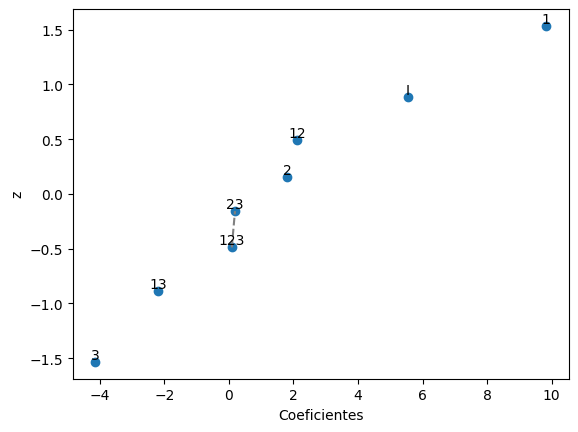

In [131]:
plt.plot(b_ordenado, valores_z, lw=0, marker="o")
for x, y, s in zip(b_ordenado, valores_z, b_coefs_ordenado):
    plt.text(x, y, s, ha="center", va="bottom")
# Valores não importantes caem numa reta.
# Neste caso não ficou tão claro pois temos só dois valores não significativos
# Mas geralmente é este o procedimento.
plt.plot(b_ordenado[2:4], valores_z[2:4], ls="--", c="gray")
plt.xlabel("Coeficientes")
plt.ylabel("z")

Se tiver curiosidade sobre como gerei este resultado, aqui está o código.

In [132]:
np.random.seed(42)
b_real = np.array([5, 10, 1, -4, 2, -2, 0, 0.5]).reshape(-1, 1)
y_real = X @ b_real
y_ruido = y_real + np.random.normal(scale=2**0.5, size=y_real.shape)
print(y_ruido)

[[-1.79754011]
 [18.30446475]
 [-2.58403009]
 [25.65388948]
 [-5.83114288]
 [ 5.16888034]
 [-6.26665582]
 [13.5853166 ]
 [ 4.33606296]
 [ 5.76729577]
 [ 4.34462841]]


## Exercícios

### Planejamento de experimentos - Parte 2

Pegue [estes dados da internet](https://data.mendeley.com/datasets/mrrr7rk5pr/1), especificamente arquivo `DOE.xlsx` na pasta compactada `DOE Analysis.zip`. Ele contém uma tabela de planejamento experimental fracionário $2^(8-4)$. Faça uma regressão linear multivariada e obtenha algumas figuras de mérito e superfícies de resposta. A resposta está contida no próprio arquivo, na forma de um Jupyter Notebook.